## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.font_manager as fm
from scipy import stats

## Exploratory Data Analysis

In [3]:
#Read the merged dataset
df = pd.read_excel('Datasets.xlsx', sheet_name='MERGED', header=4, usecols="B:BO", skiprows=range(0), nrows=47)

In [5]:
# Summary statistics for the dependent variable
dependent_variable = 'price_m2'
summary_dependent = df[dependent_variable].describe()
print("Summary Statistics for", dependent_variable)
print(summary_dependent)
print()


Summary Statistics for price_m2
count       46.000000
mean      5271.500000
std       1866.552327
min       2536.000000
25%       3625.750000
50%       5125.000000
75%       6491.250000
max      10393.000000
Name: price_m2, dtype: float64



In [6]:
skewness = df['price_m2'].skew()
kurtosis = df['price_m2'].kurtosis()

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)


Skewness: 0.683282667449347
Kurtosis: -0.06469342590396243


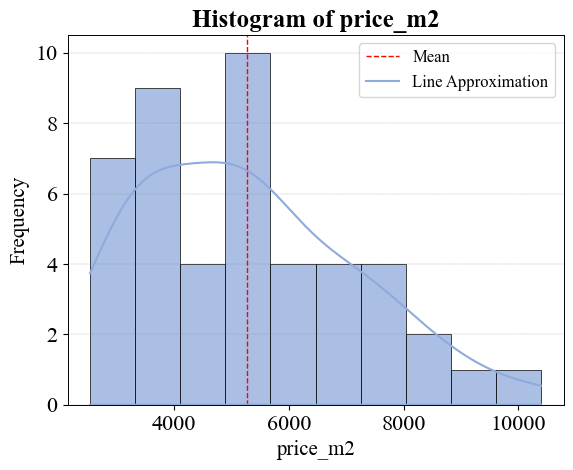

In [10]:
custom_palette = ['#a981bc', '#8faadd', '#e7e6e6', '#767171', '#816592']
sns.set_palette(custom_palette)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

min_value = 2536.000000
max_value = 10393.000000
bin_width = 750
mu = 5271.5

n_bins = int((max_value - min_value) / bin_width)

ax = sns.histplot(df['price_m2'], bins=n_bins, kde=True, color='#8faadd', alpha=0.75, linewidth=0.5)

plt.xlabel('price_m2', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of price_m2', fontsize=18, fontweight='bold')

plt.axvline(x=mu, color='red', linestyle='--', linewidth=1, label='Mean')

mu, std = norm.fit(df['price_m2'])
x = np.linspace(df['price_m2'].min(), df['price_m2'].max(), 100)
y = norm.pdf(x, mu, std)
plt.plot(x, y, color='#8faadd', linewidth=1.5, label='Line Approximation')

ax.set_facecolor('white')
ax.yaxis.grid(True, linestyle='dashed', color='gray', linewidth=0.2)
ax.xaxis.grid(False)


ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(0.7)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.7)
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(0.7)
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth(0.7)

#plt.savefig('Hist1.png', dpi=300, bbox_inches='tight')

plt.legend(fontsize=12)

plt.show()

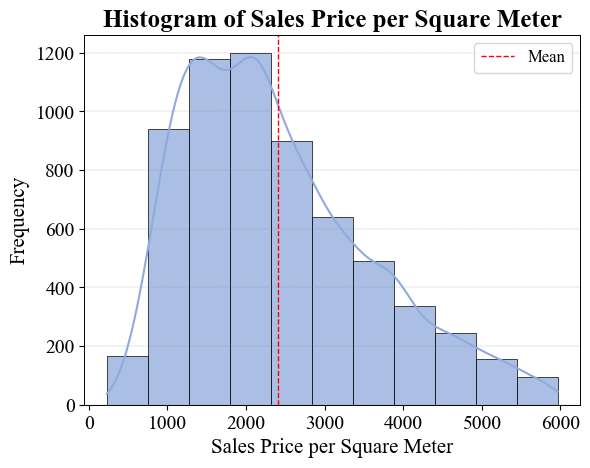

In [12]:
#Plotting the histogram for all buildings constructed after 2019

data = pd.read_excel('prf_venda.xlsx', sheet_name = "Sheet3")

custom_palette = ['#a981bc', '#8faadd', '#e7e6e6', '#767171', '#816592']
sns.set_palette(custom_palette)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

min_value = 230
max_value = 5966
bin_width = 500
mu = 2405

n_bins = int((max_value - min_value) / bin_width)

ax = sns.histplot(data['price_m2'], bins=n_bins, kde = True, color='#8faadd', alpha=0.75, linewidth = 0.5)

plt.xlabel('Sales Price per Square Meter', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of Sales Price per Square Meter', fontsize=18, fontweight='bold')

plt.axvline(x=mu, color='red', linestyle='--', linewidth=1, label='Mean')

ax.set_facecolor('white')
ax.yaxis.grid(True, linestyle='dashed', color='gray', linewidth=0.2)
ax.xaxis.grid(False)


ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(0.7)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.7)
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(0.7)
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth(0.7)

#plt.savefig('Hist2.png', dpi=300, bbox_inches='tight')


plt.legend(fontsize=12)
plt.show()

In [28]:
# Normality test for the dependent variable (Shapiro-Wilk)
statistic, p_value = stats.shapiro(df['price_m2'])

print("Shapiro-Wilk Test")
print(f"Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value > alpha:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

Shapiro-Wilk Test
Statistic: 0.9461
P-value: 0.0331
The data does not appear to be normally distributed.


In [32]:
#Logarithmic transformation to the dependent variable
def logarithmic_transform(variable):
    transformed = np.log1p(variable)
    return transformed

values = df["price_m2"]

transformed_values = logarithmic_transform(values)
print(transformed_values)

0     8.864181
1     8.078068
2     7.838738
3     9.107310
4     7.952967
5     8.430109
6     8.954803
7     8.245384
8     8.518193
9     8.904902
10    8.019942
11    8.606851
12    9.248984
13    8.717846
14    8.509766
15    8.272060
16    8.043663
17    8.697513
18    9.020752
19    8.187577
20    8.098947
21    8.140898
22    8.804325
23    8.576217
24    8.919587
25    8.872627
26    8.552753
27    8.784162
28    8.006701
29    8.760767
30    8.155649
31    9.069007
32    8.588024
33    8.130059
34    8.532673
35    8.221210
36    8.160804
37    8.223627
38    8.563695
39    8.551401
40    8.579604
41    8.424200
42    8.493310
43    8.914088
44    8.665268
45    8.457868
Name: price_m2, dtype: float64


In [30]:
#Normalize the dependent variable
def normalize_variable(variable):
    mean = np.mean(variable)
    std = np.std(variable)
    normalized = (variable - mean) / std
    return normalized

values = df["price_m2"]

normalized_values = normalize_variable(values)
print(normalized_values)

0     0.975813
1    -1.110147
2    -1.481730
3     2.030439
4    -1.315439
5    -0.373479
6     1.339272
7    -0.792188
8    -0.144896
9     1.135063
10   -1.208730
11    0.106438
12    2.774148
13    0.454188
14   -0.167646
15   -0.736396
16   -1.169189
17    0.387563
18    1.625272
19   -0.908105
20   -1.073313
21   -0.996938
22    0.753188
23    0.017063
24    1.194105
25    1.008313
26   -0.049563
27    0.681146
28   -1.230397
29    0.599355
30   -0.969313
31    1.846814
32    0.051188
33   -1.016980
34   -0.105354
35   -0.841480
36   -0.959563
37   -0.836605
38   -0.018688
39   -0.053354
40    0.026813
41   -0.388105
42   -0.211521
43    1.171897
44    0.284646
45   -0.303604
Name: price_m2, dtype: float64


In [31]:
# Normality test for the normalized dependent variable (Shapiro-Wilk)
statistic, p_value = stats.shapiro(normalized_values)

print("Shapiro-Wilk Test")
print(f"Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value > alpha:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

Shapiro-Wilk Test
Statistic: 0.9461
P-value: 0.0331
The data does not appear to be normally distributed.


In [33]:
# Normality test for the transformed dependent variable (Shapiro-Wilk)
from scipy import stats

statistic, p_value = stats.shapiro(transformed_values)

print("Shapiro-Wilk Test")
print(f"Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value > alpha:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

Shapiro-Wilk Test
Statistic: 0.9734
P-value: 0.3679
The data appears to be normally distributed.


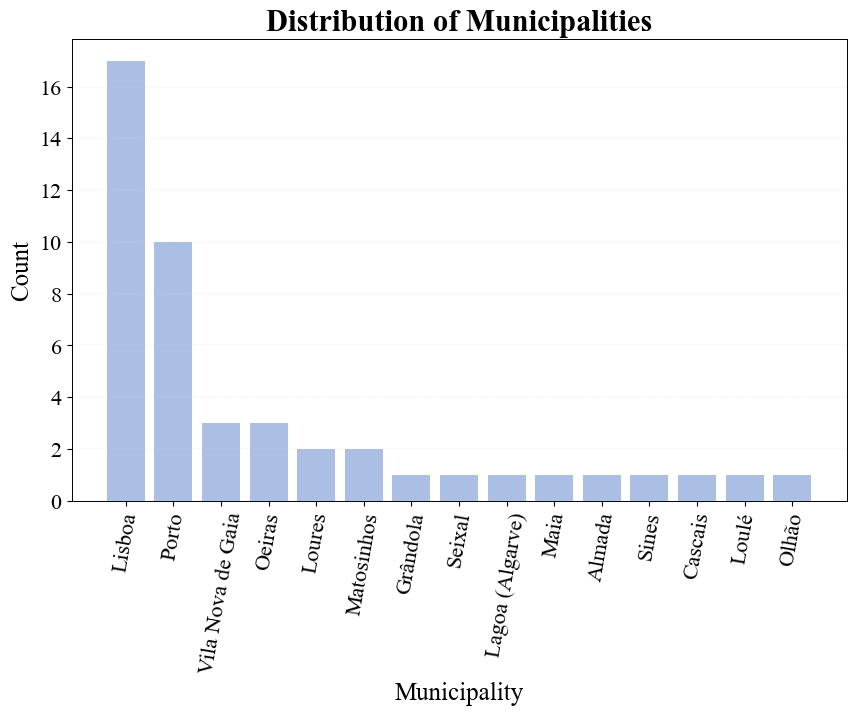

In [15]:
#Plotting the bar chart for the "municipalities" variable
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

municipality_counts = df['municipality'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(municipality_counts.index, municipality_counts.values, color='#8faadd', alpha=0.75, linewidth=0.5)

plt.xlabel('Municipality', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Distribution of Municipalities', fontsize=22, fontweight='bold')
plt.xticks(rotation=80)

plt.gca().yaxis.grid(True, linestyle='dashed', color='lightgrey', linewidth=0.2)
plt.gca().xaxis.grid(False)

plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(0.7)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(0.7)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['right'].set_linewidth(0.7)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['top'].set_linewidth(0.7)

#plt.savefig('BarChart.png', dpi=300, bbox_inches='tight')

plt.show()



In [17]:
#Read a new dataset with treated data
df2 = pd.read_excel('Datasets.xlsx', sheet_name='MERGED_treated', header=4, usecols="B:BN", skiprows=range(0), nrows=47, na_values=['.'])

# Convert '0%' values to string type to prevent automatic conversion to NaN
df2['1_perc_rehab'] = df2['1_perc_rehab'].astype(str)
df2['2_rainwater_reuse'] = df2['2_rainwater_reuse'].astype(str)
df2['1_perc_green'] = df2['1_perc_green'].astype(str)
df2['2_materials_natural_recycled'] = df2['2_materials_natural_recycled'].astype(str)
df2['2_materials_locally'] = df2['2_materials_locally'].astype(str)
df2['2_certified_materials'] = df2['2_certified_materials'].astype(str)
df2['3_treated_wastewater'] = df2['3_treated_wastewater'].astype(str)

df2['1_perc_rehab'] = df2['1_perc_rehab'].replace('0', '0%')
df2['2_rainwater_reuse'] = df2['2_rainwater_reuse'].replace('0', '0%')
df2['1_perc_green'] = df2['1_perc_green'].replace('0', '0%')
df2['2_materials_natural_recycled'] = df2['2_materials_natural_recycled'].replace('0', '0%')
df2['2_materials_locally'] = df2['2_materials_locally'].replace('0', '0%')
df2['2_certified_materials'] = df2['2_certified_materials'].replace('0', '0%')
df2['3_treated_wastewater'] = df2['3_treated_wastewater'].replace('0', '0%')

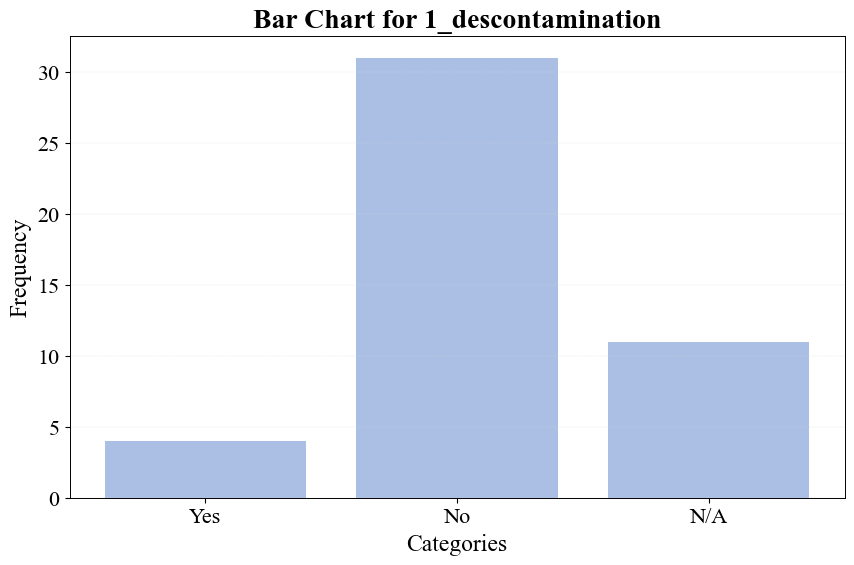

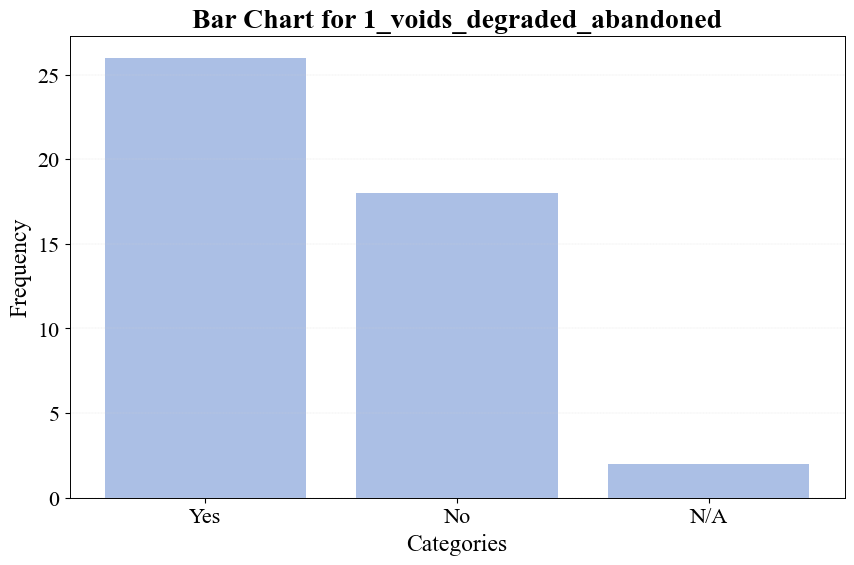

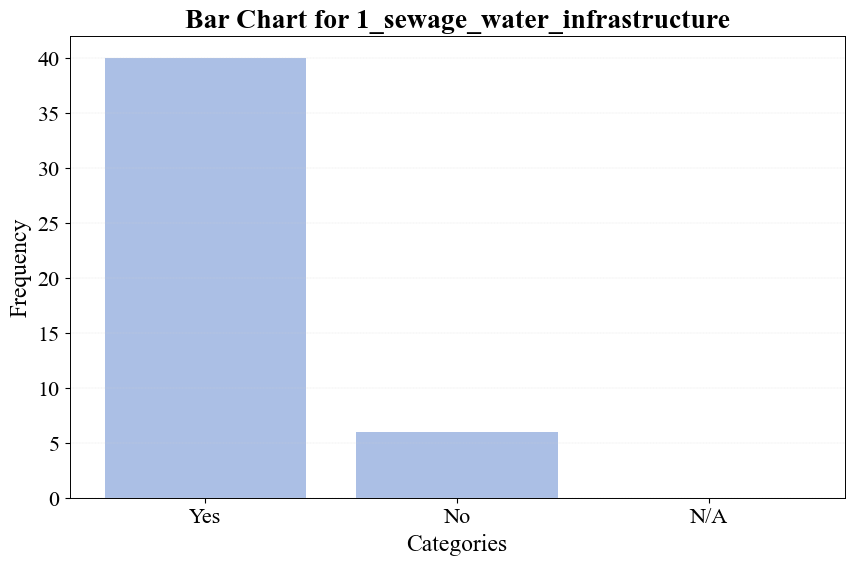

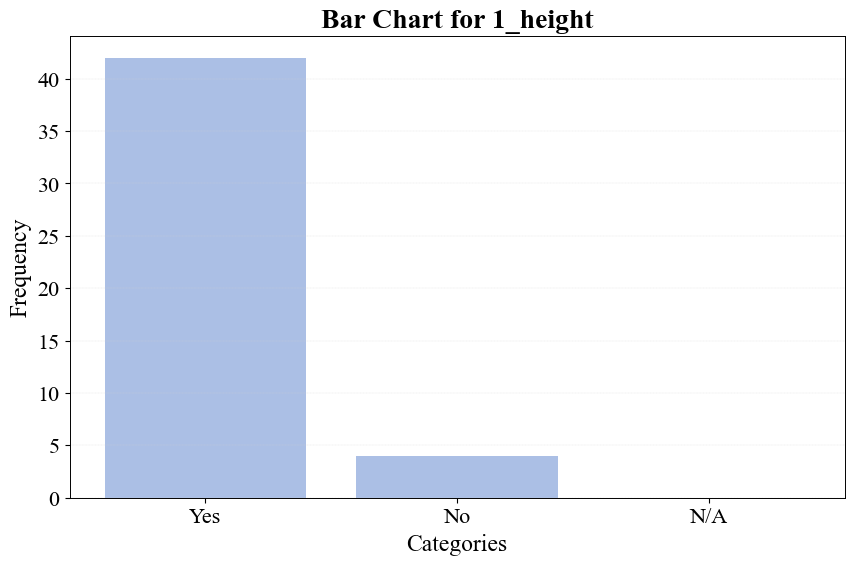

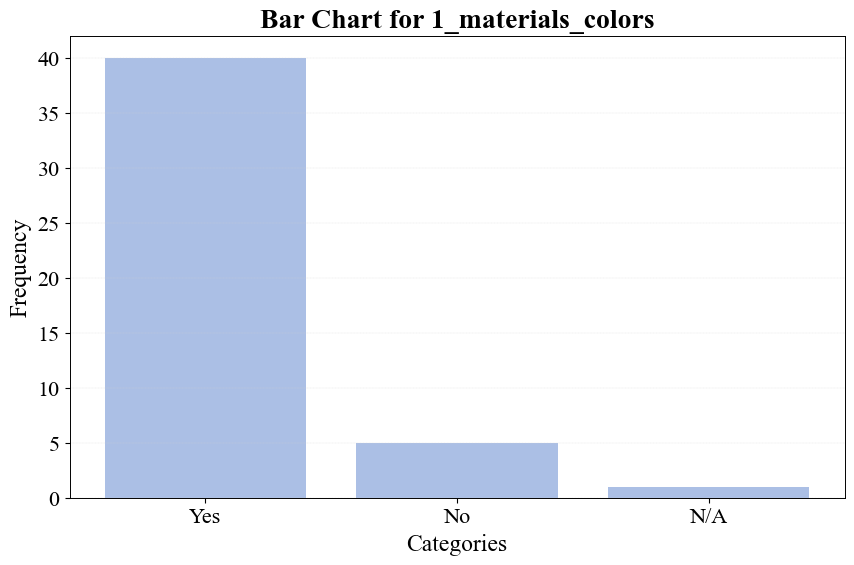

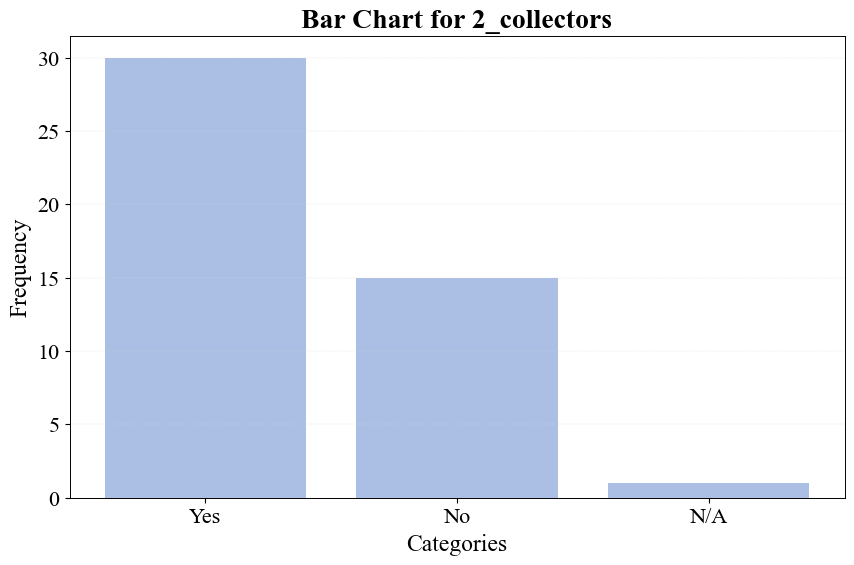

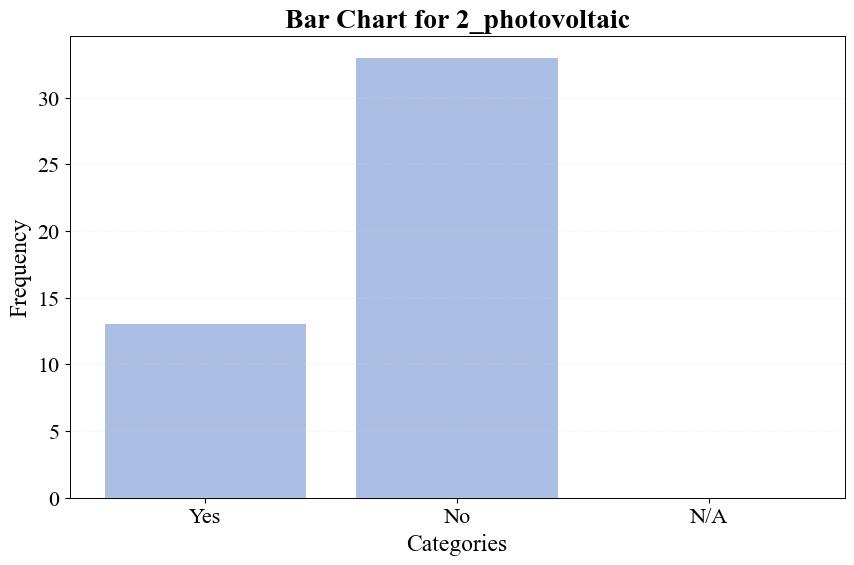

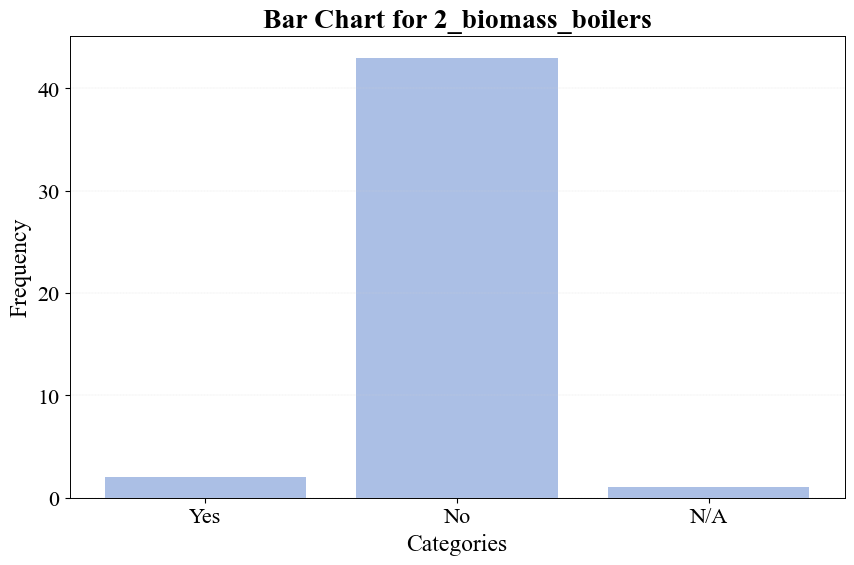

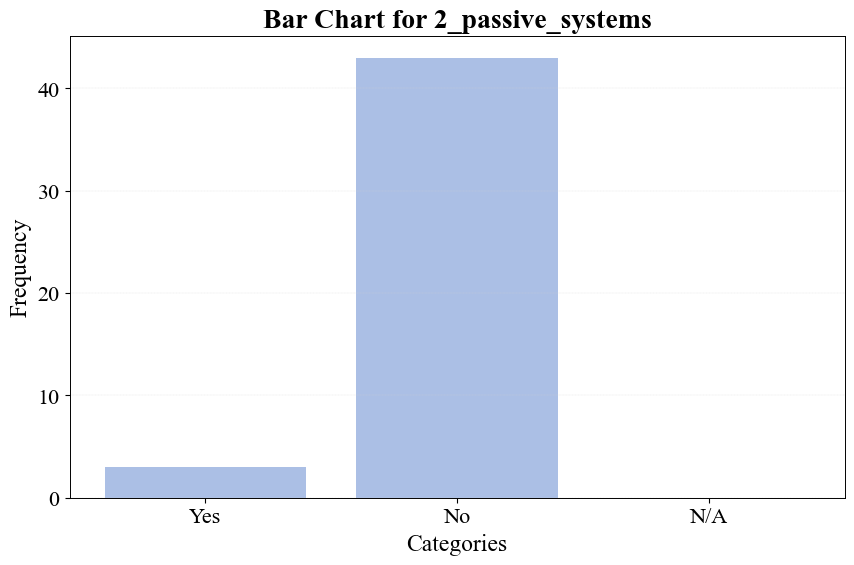

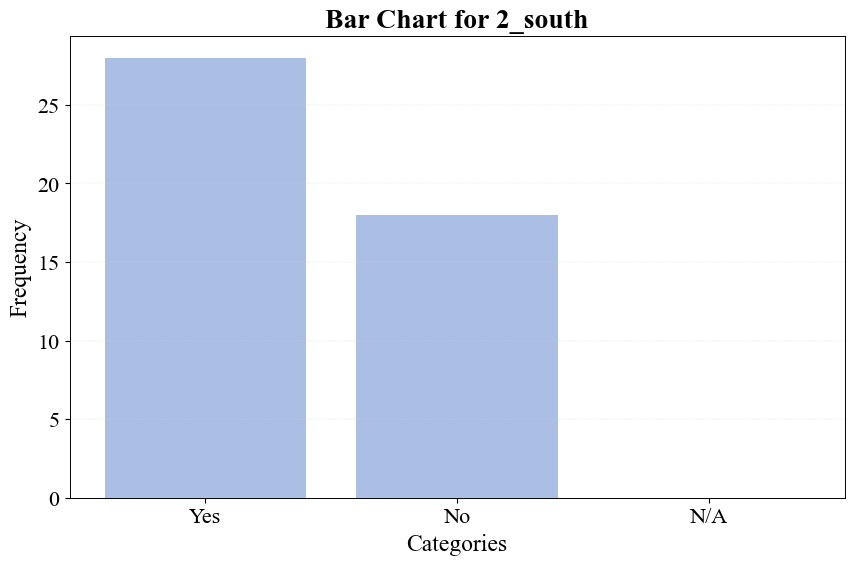

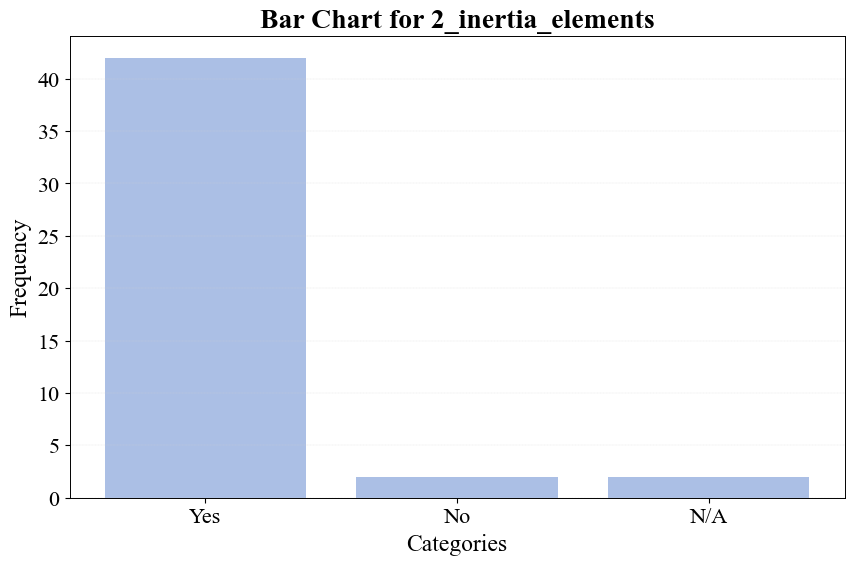

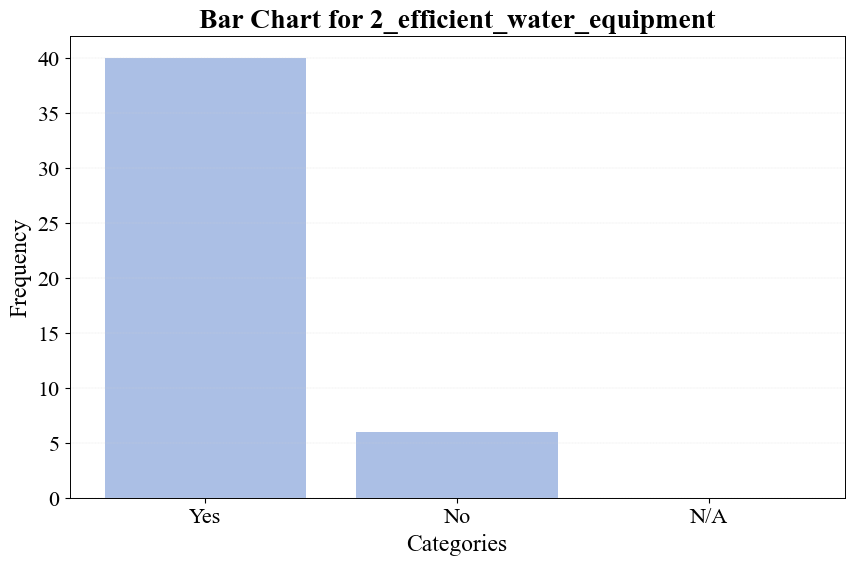

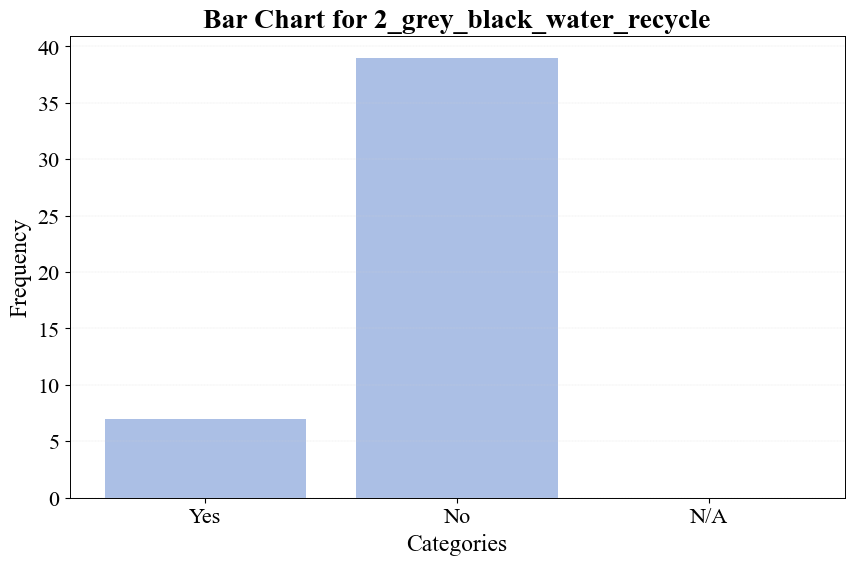

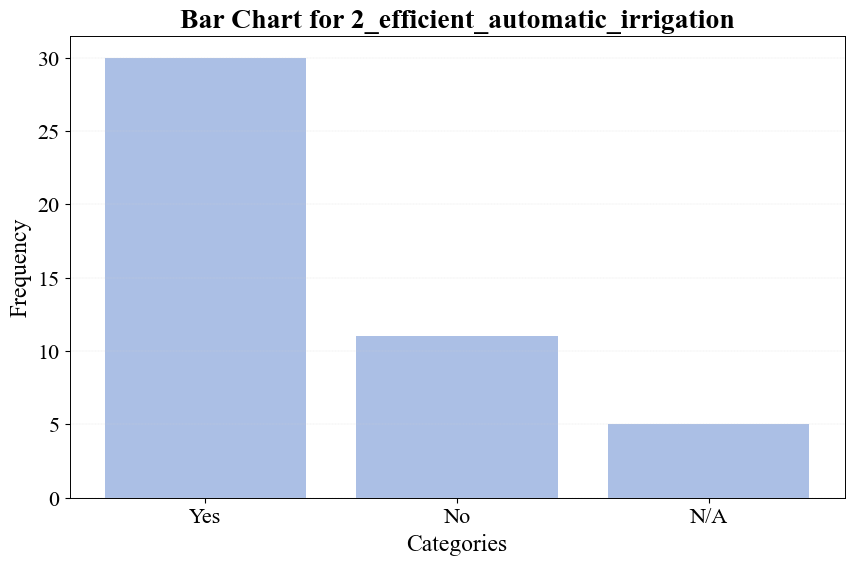

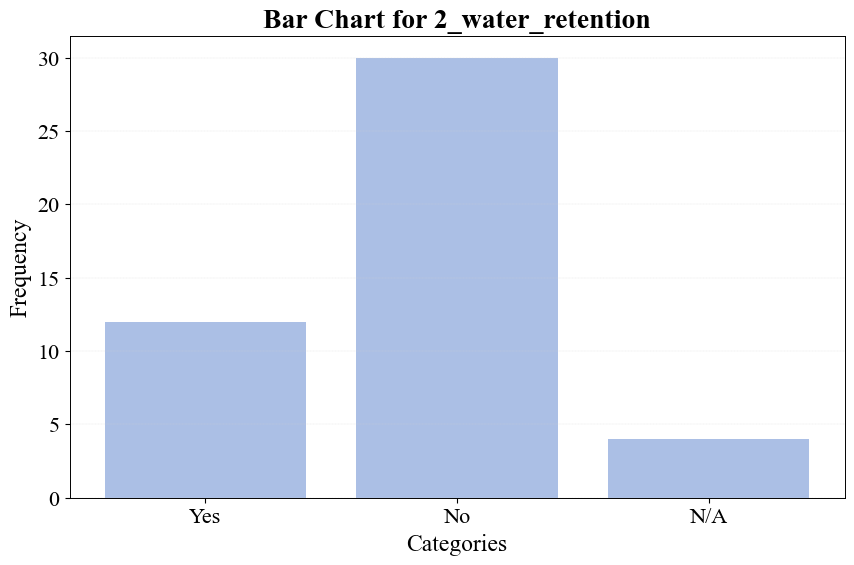

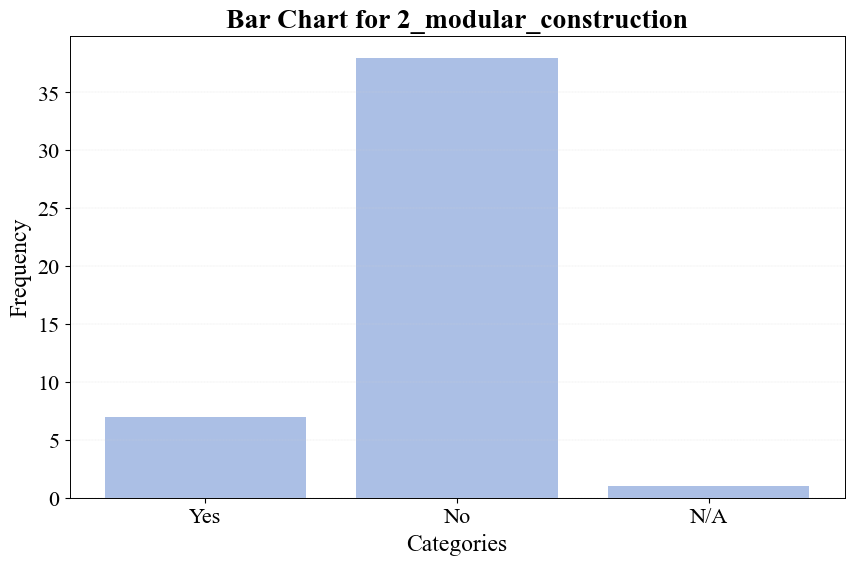

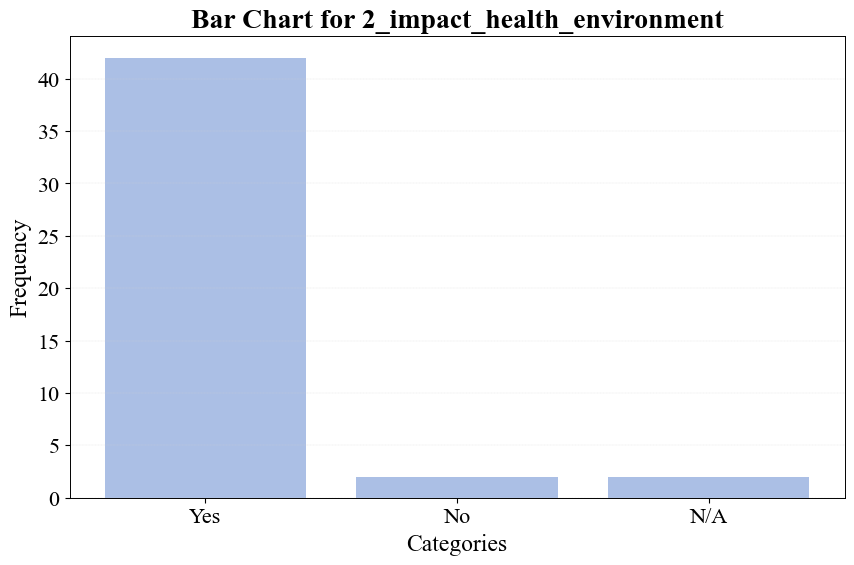

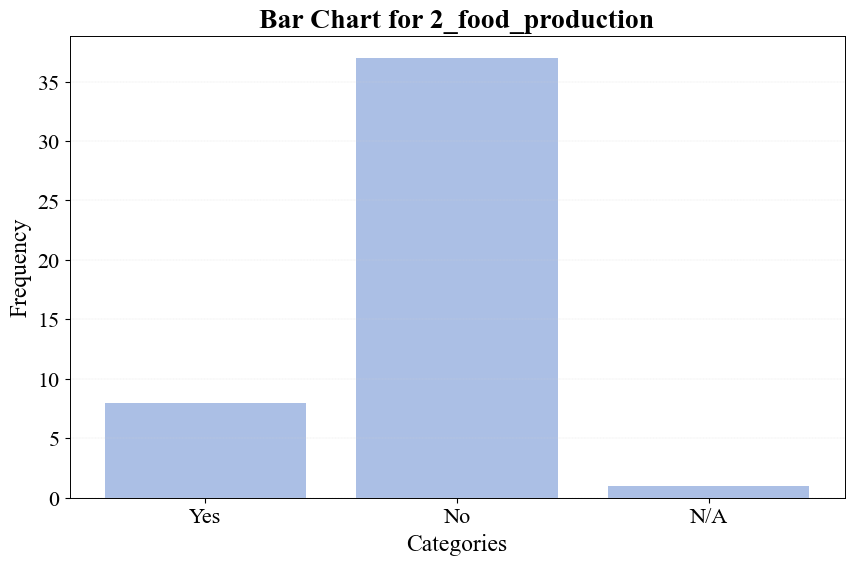

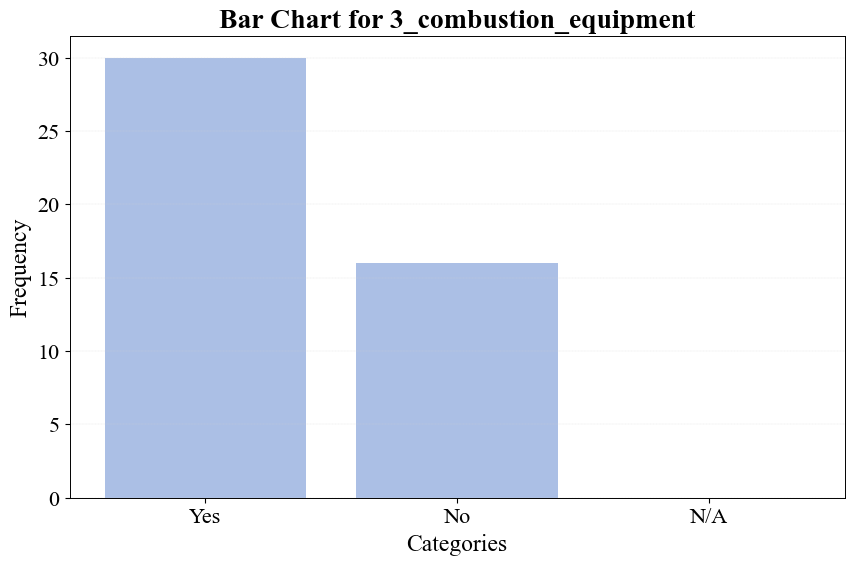

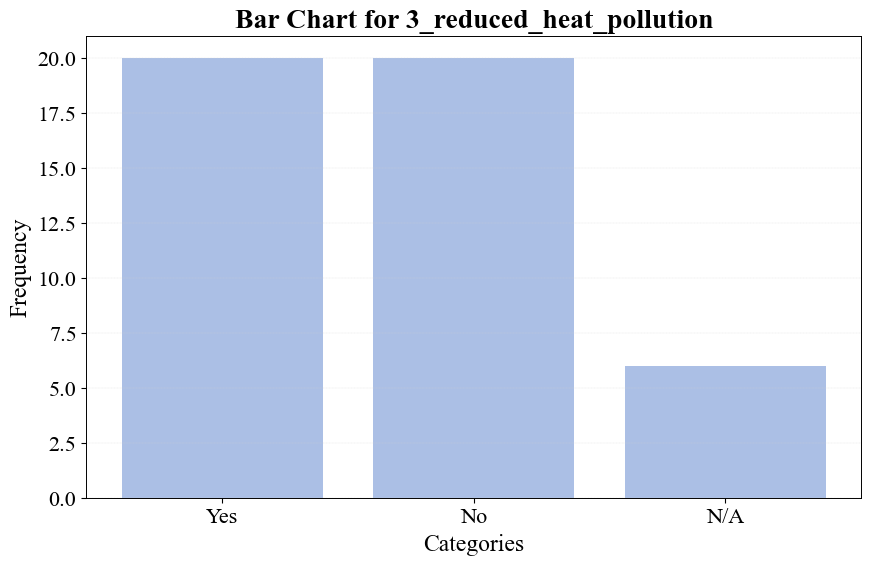

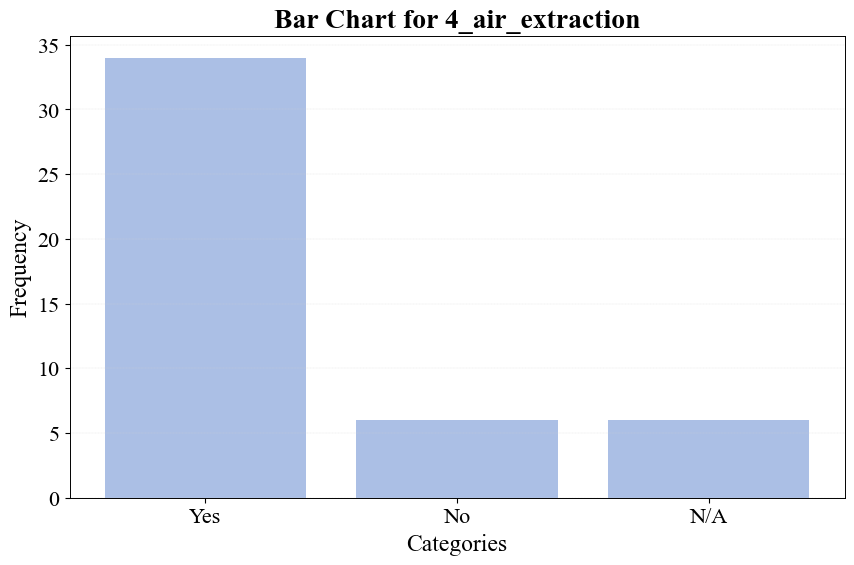

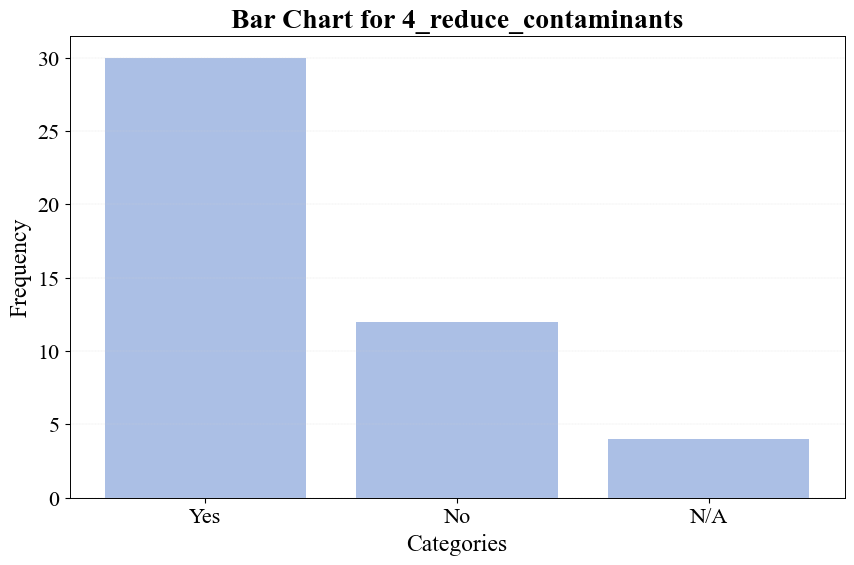

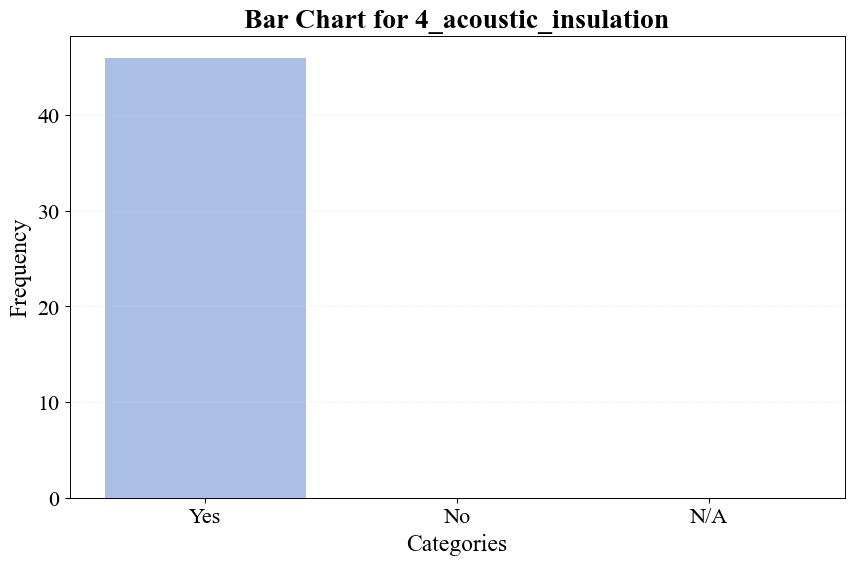

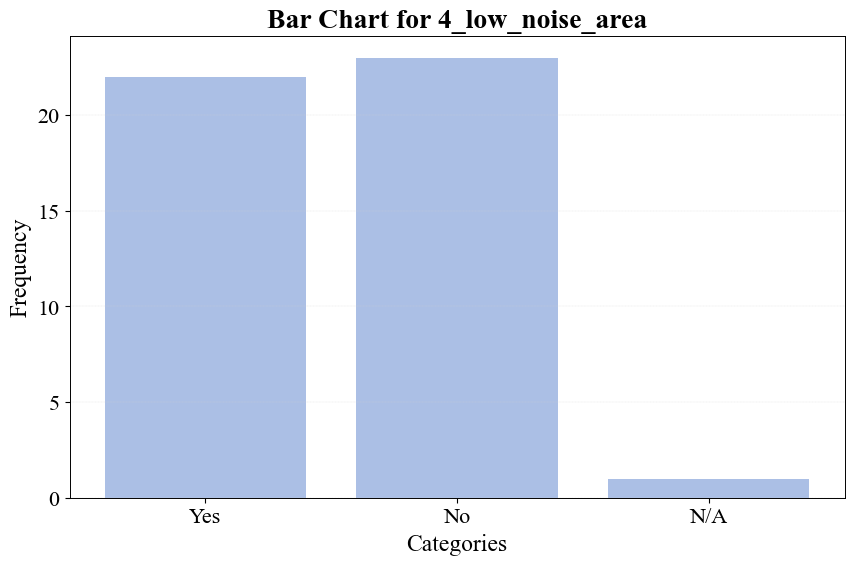

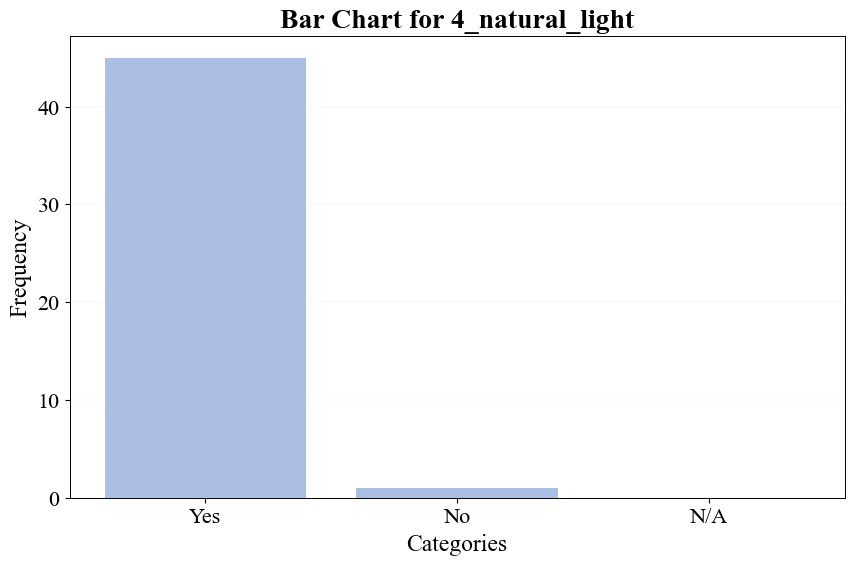

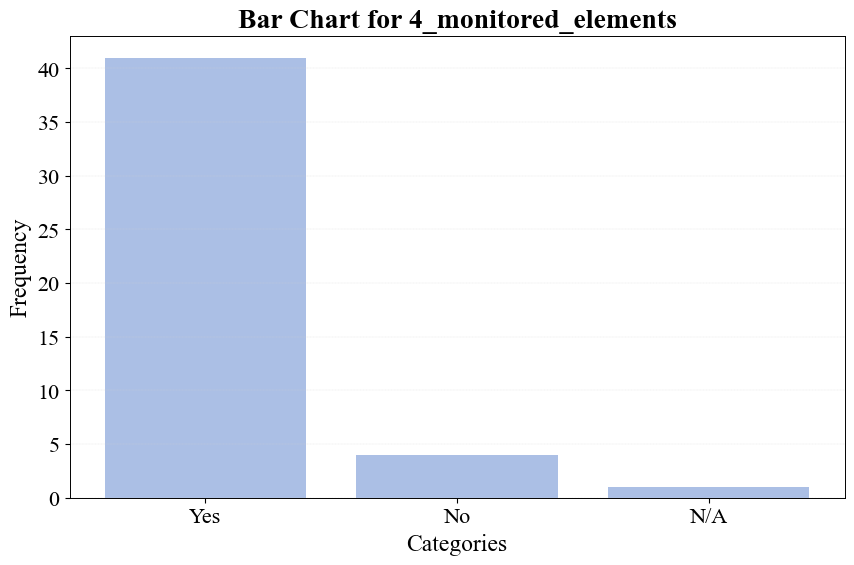

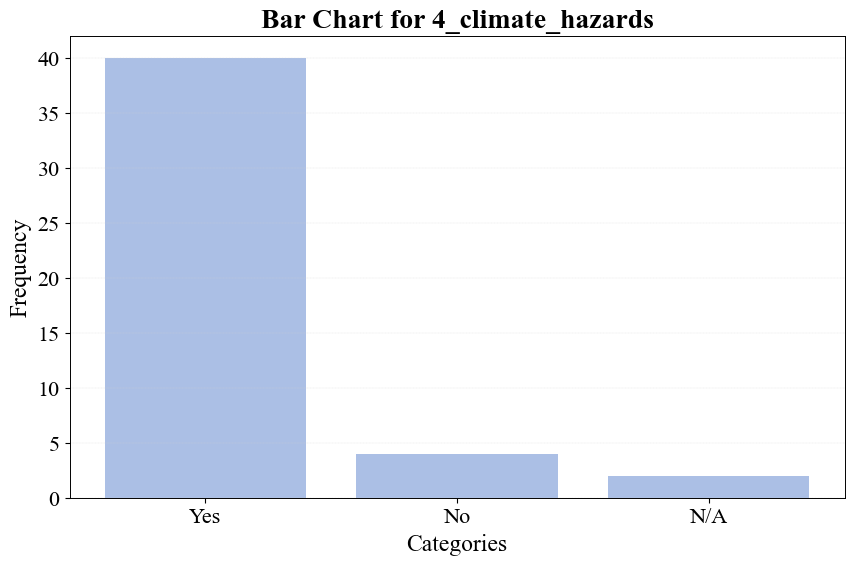

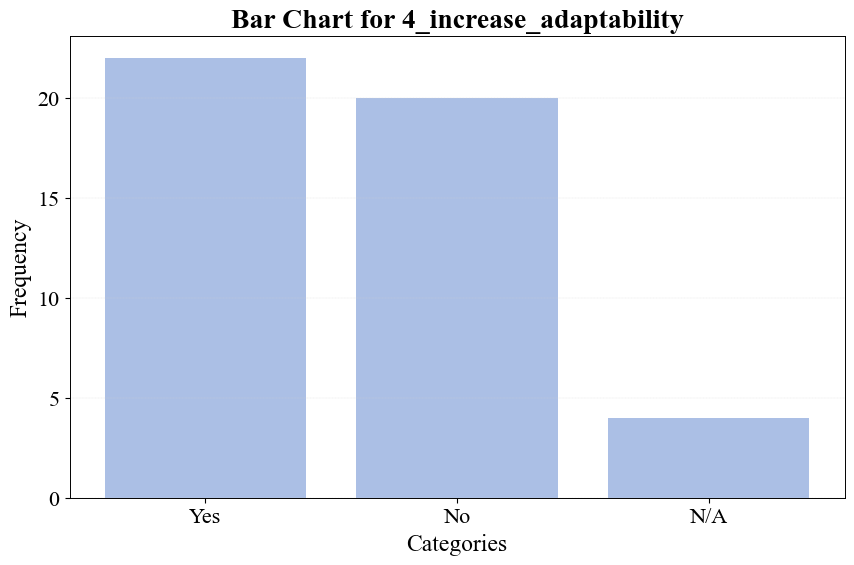

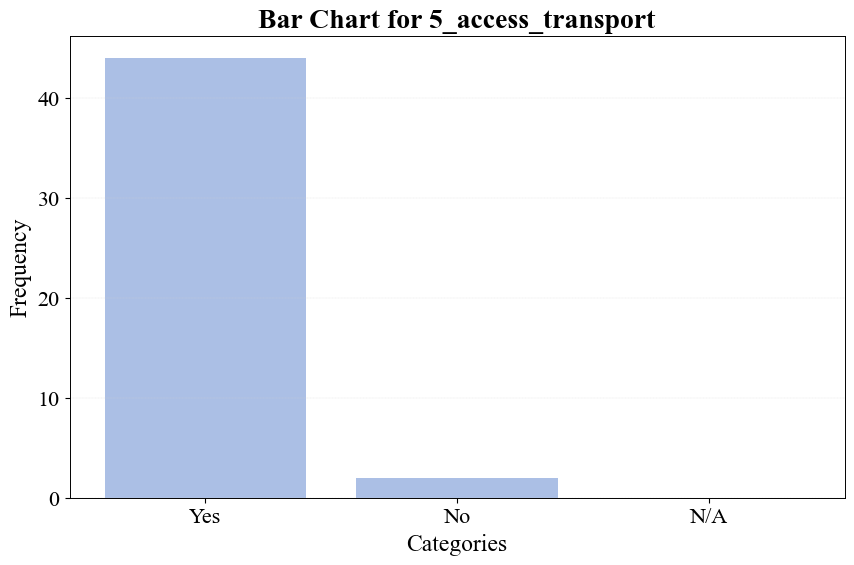

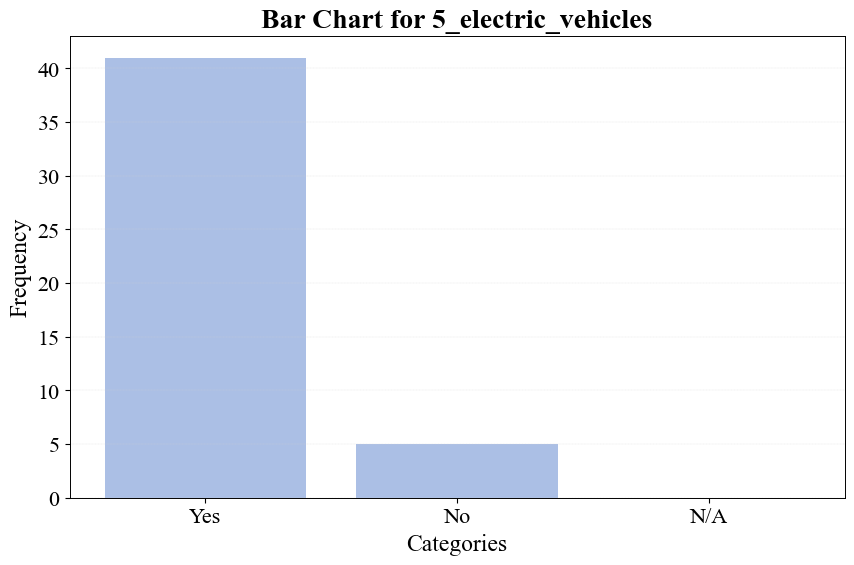

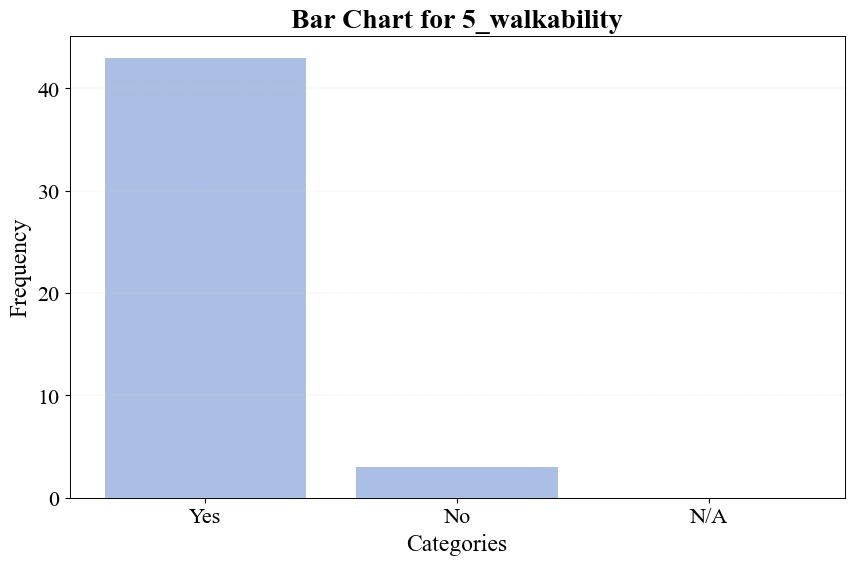

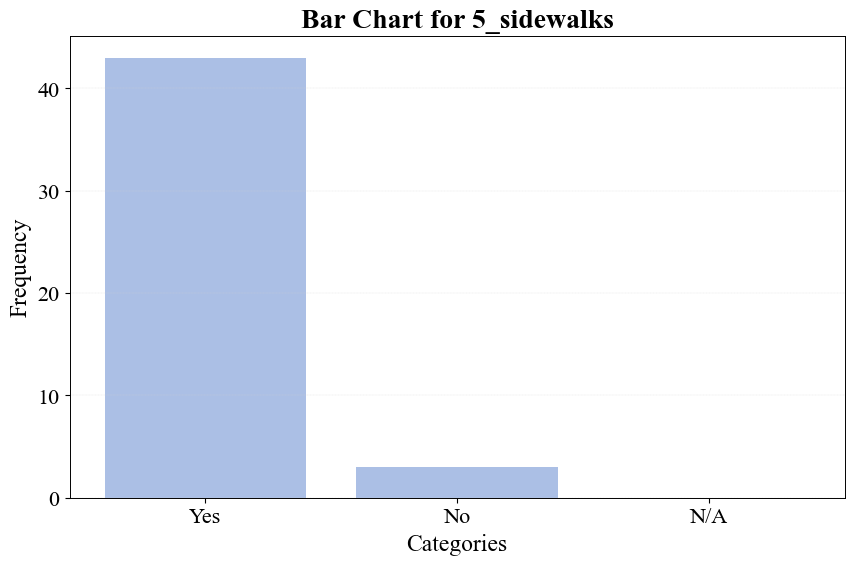

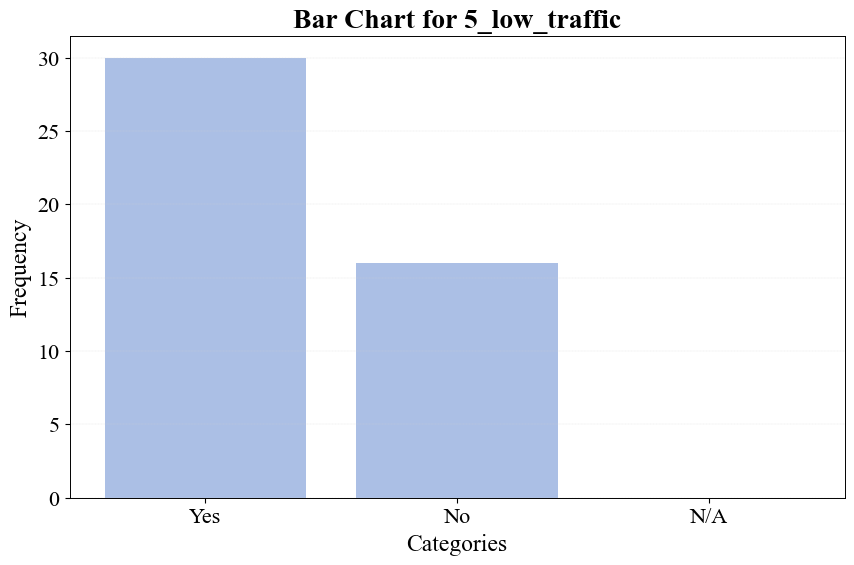

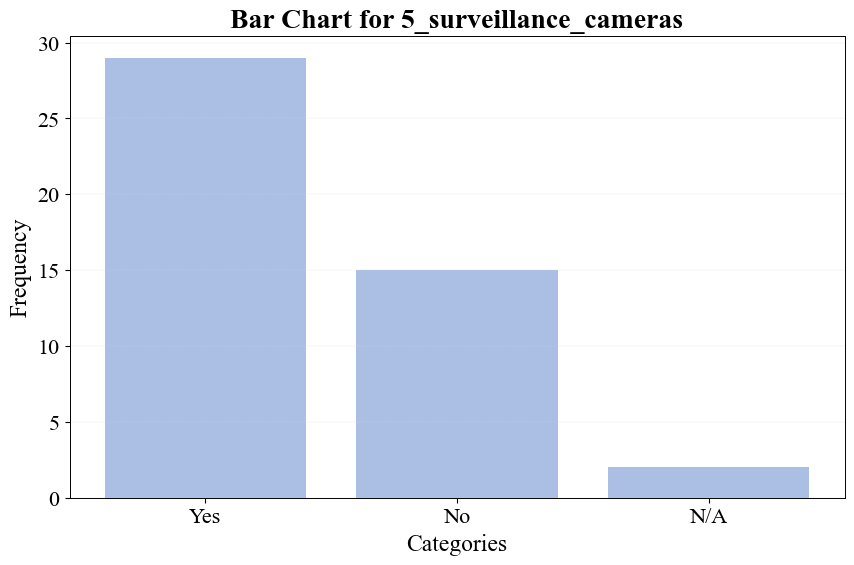

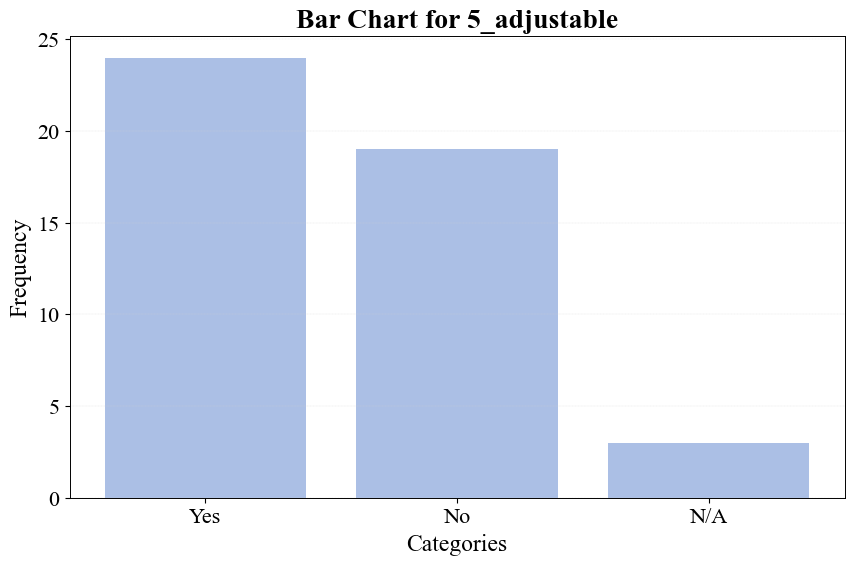

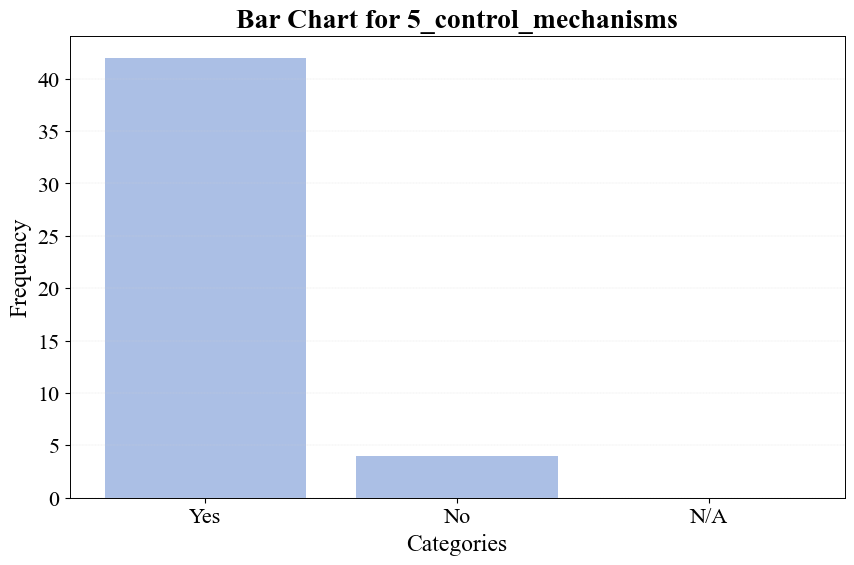

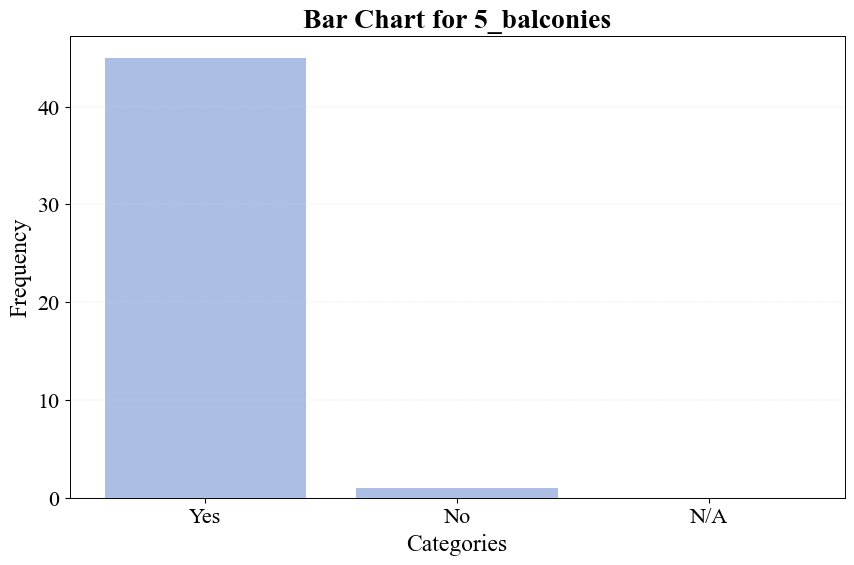

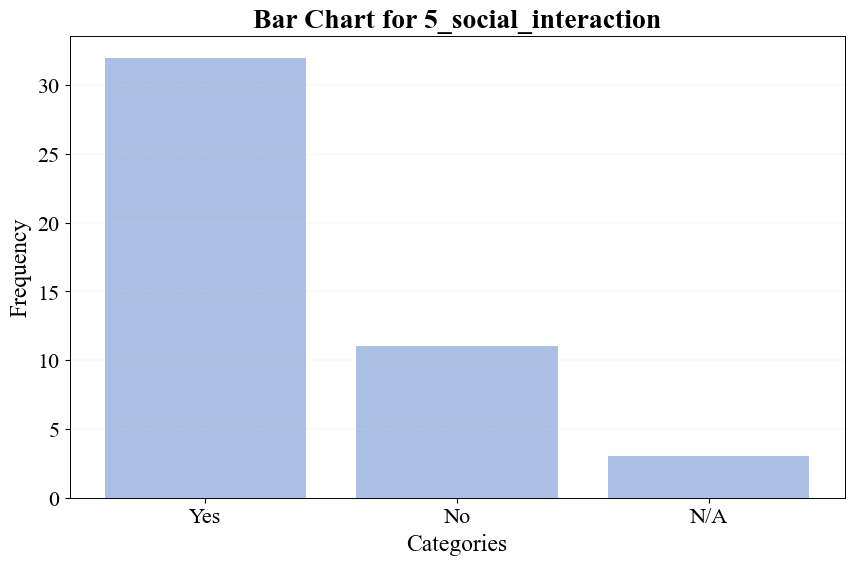

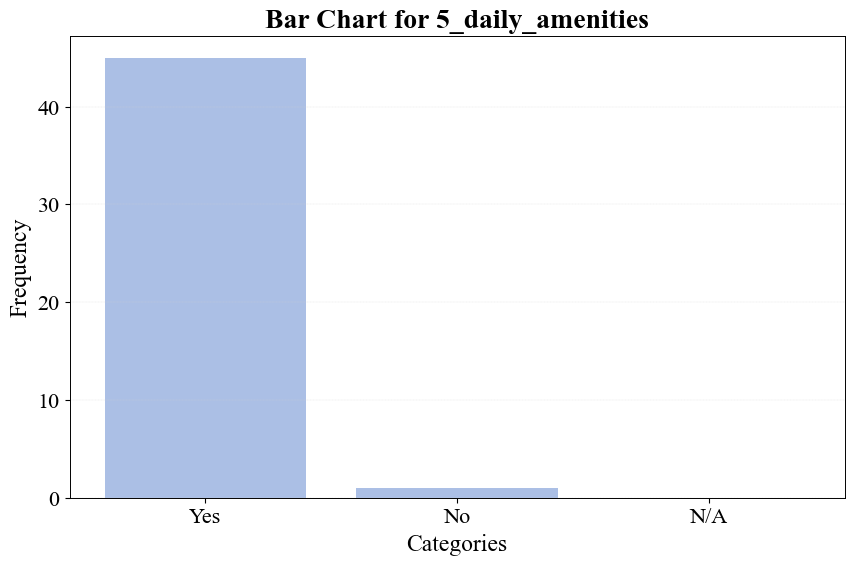

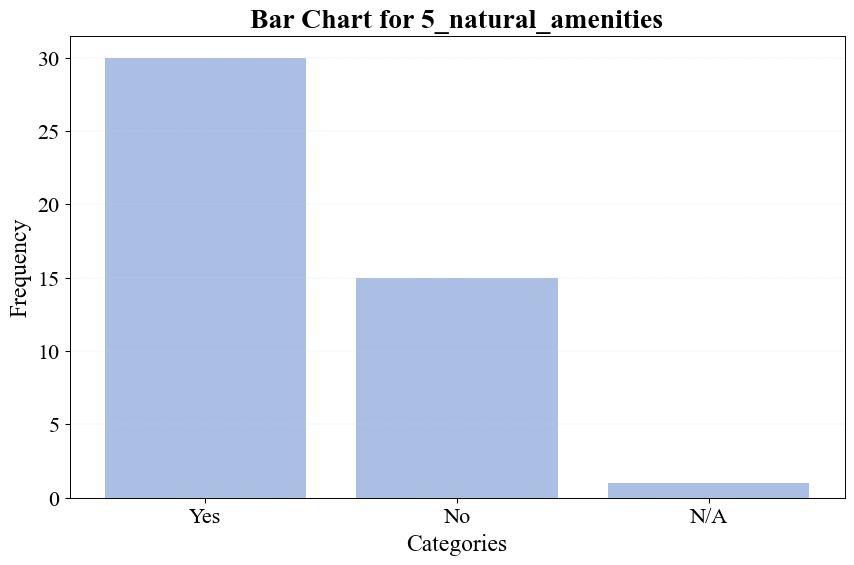

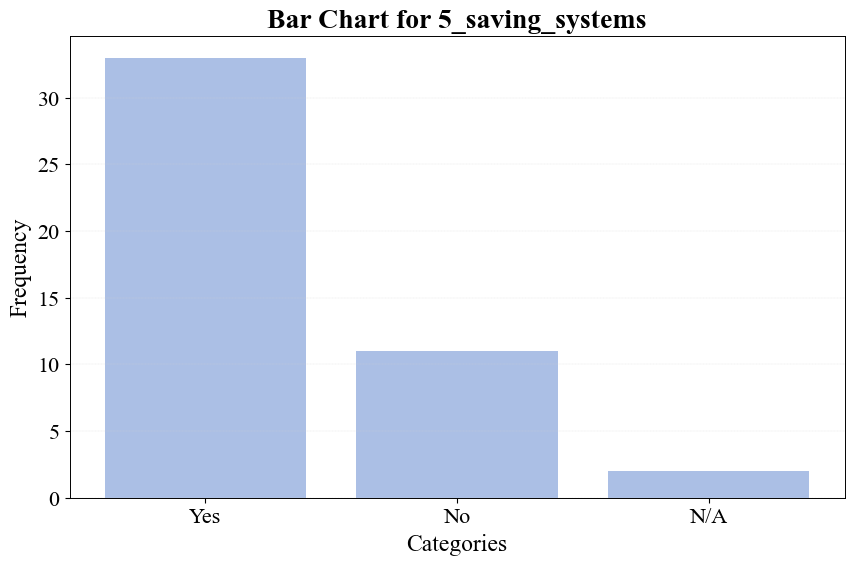

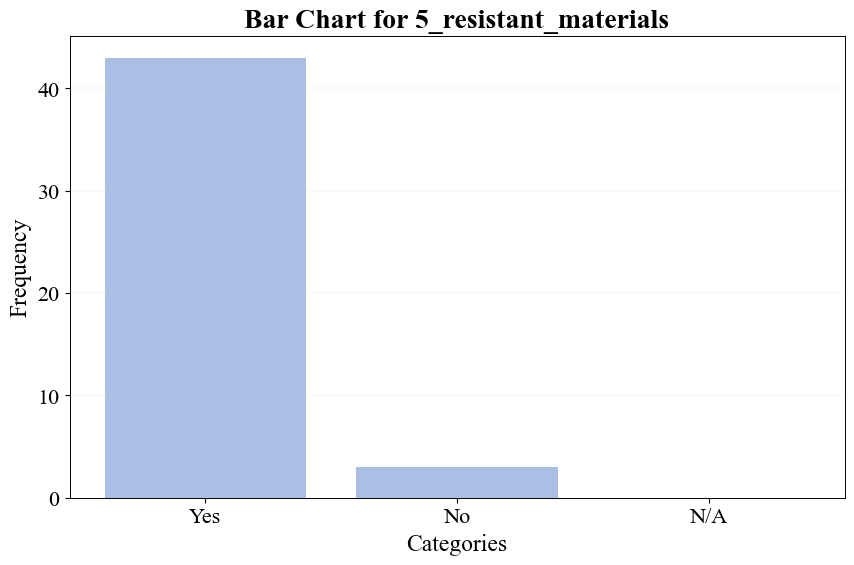

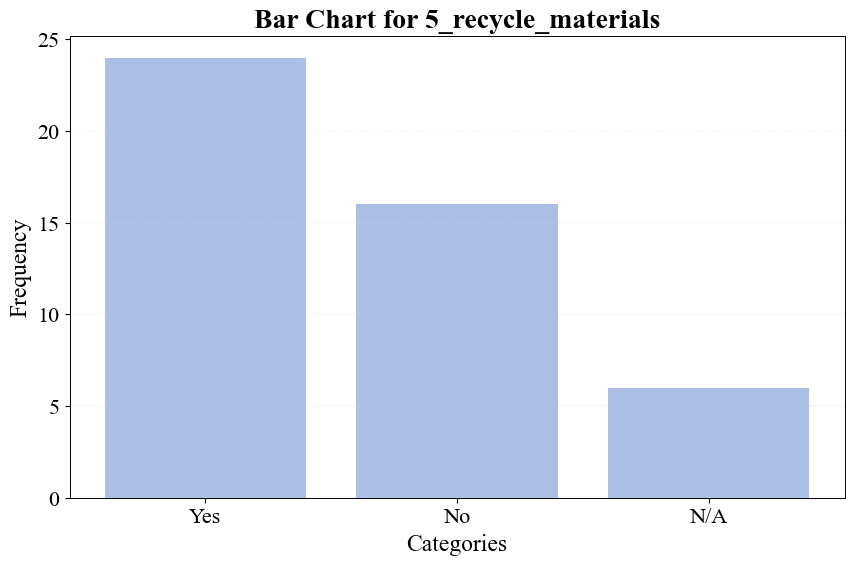

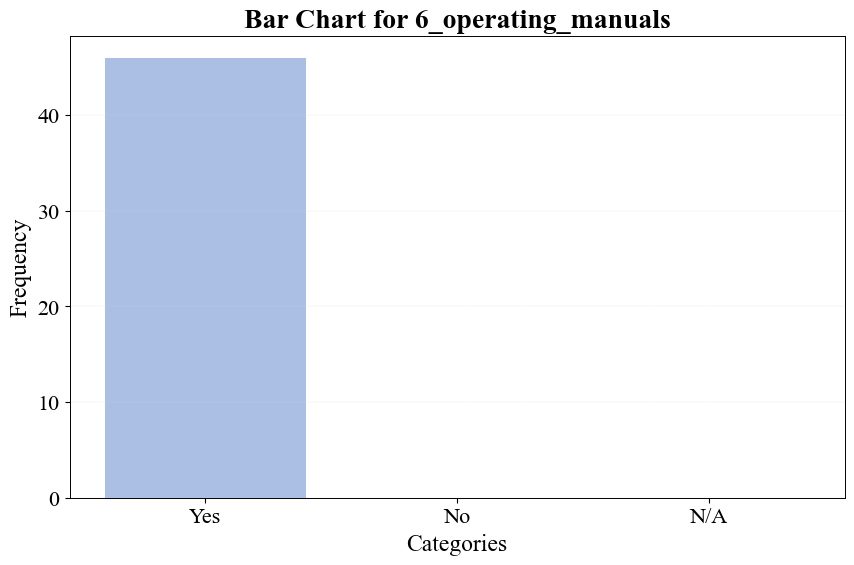

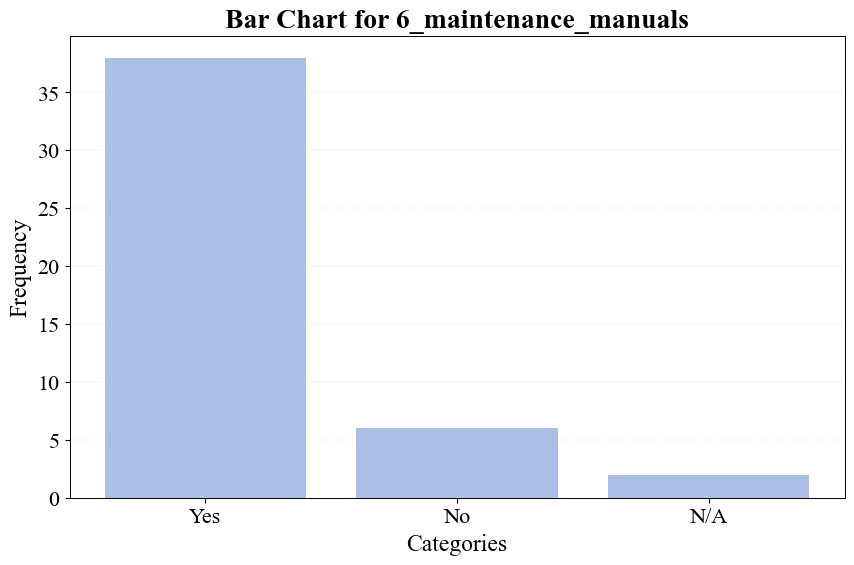

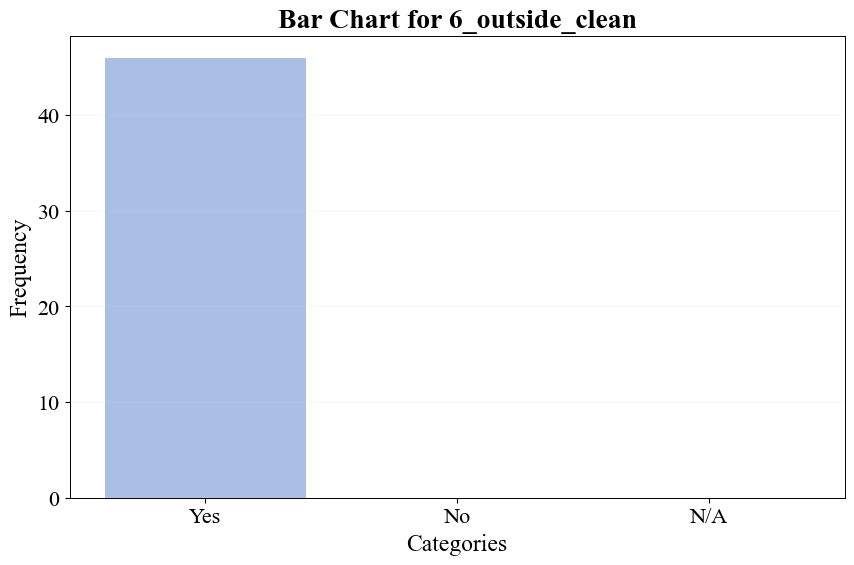

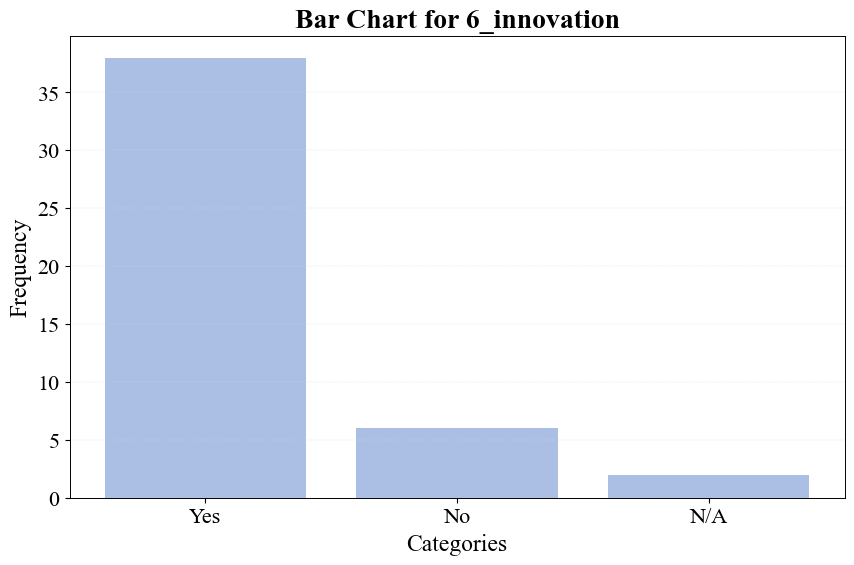

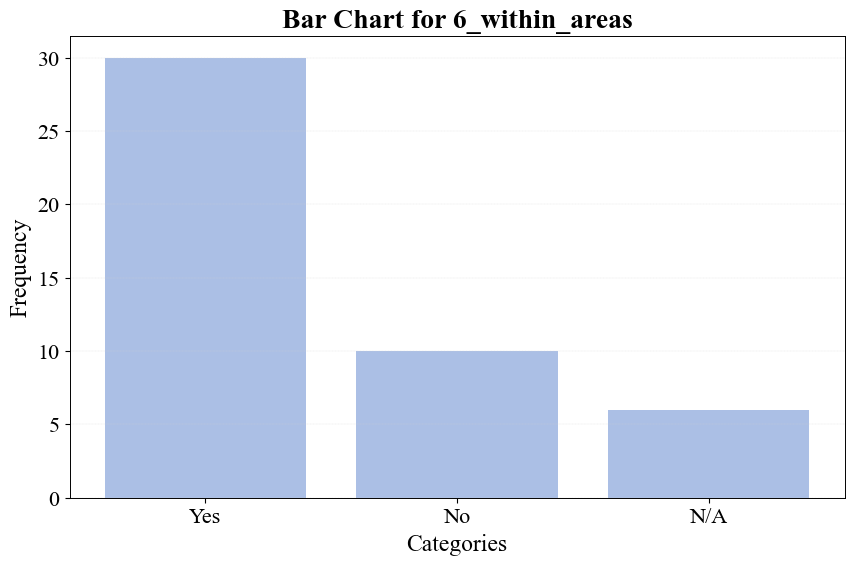

In [18]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

category_order = ['Yes', 'No', 'N/A']

categorical_vars = [
    '1_descontamination', '1_voids_degraded_abandoned', '1_sewage_water_infrastructure',
    '1_height', '1_materials_colors',
    '2_collectors', '2_photovoltaic', '2_biomass_boilers', '2_passive_systems',
    '2_south', '2_inertia_elements', '2_efficient_water_equipment',
    '2_grey_black_water_recycle', '2_efficient_automatic_irrigation',
    '2_water_retention', '2_modular_construction', '2_impact_health_environment',
    '2_food_production','3_combustion_equipment',
    '3_reduced_heat_pollution', '4_air_extraction',
    '4_reduce_contaminants', '4_acoustic_insulation', '4_low_noise_area',
    '4_natural_light', '4_monitored_elements', '4_climate_hazards',
    '4_increase_adaptability', '5_access_transport', '5_electric_vehicles',
    '5_walkability', '5_sidewalks', '5_low_traffic', '5_surveillance_cameras',
    '5_adjustable', '5_control_mechanisms', '5_balconies', '5_social_interaction',
    '5_daily_amenities', '5_natural_amenities', '5_saving_systems',
    '5_resistant_materials', '5_recycle_materials', '6_operating_manuals',
    '6_maintenance_manuals', '6_outside_clean', '6_innovation', '6_within_areas'
]

# Create bar charts for each categorical variable
for var in categorical_vars:
    category_counts = df[var].value_counts(dropna=False)
    
    category_counts.index = category_counts.index.fillna('N/A')
    category_counts = category_counts.reindex(category_order, fill_value=0)
    
    plt.figure(figsize=(10, 6))
    plt.bar(category_counts.index, category_counts.values, color='#8faadd', alpha=0.75, linewidth=0.5, width=0.8)
    
    plt.title(f'Bar Chart for {var}', fontsize=20, fontweight='bold')
    plt.xlabel('Categories', fontsize=17)
    plt.ylabel('Frequency', fontsize=17)

    plt.gca().yaxis.grid(True, linestyle='dashed', color='lightgrey', linewidth=0.2)
    plt.gca().xaxis.grid(False)

    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['left'].set_linewidth(0.7)
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['bottom'].set_linewidth(0.7)
    plt.gca().spines['right'].set_color('black')
    plt.gca().spines['right'].set_linewidth(0.7)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['top'].set_linewidth(0.7)
   
    #plt.savefig(f'{var}_bar_chart.png', dpi=300)

    plt.show()

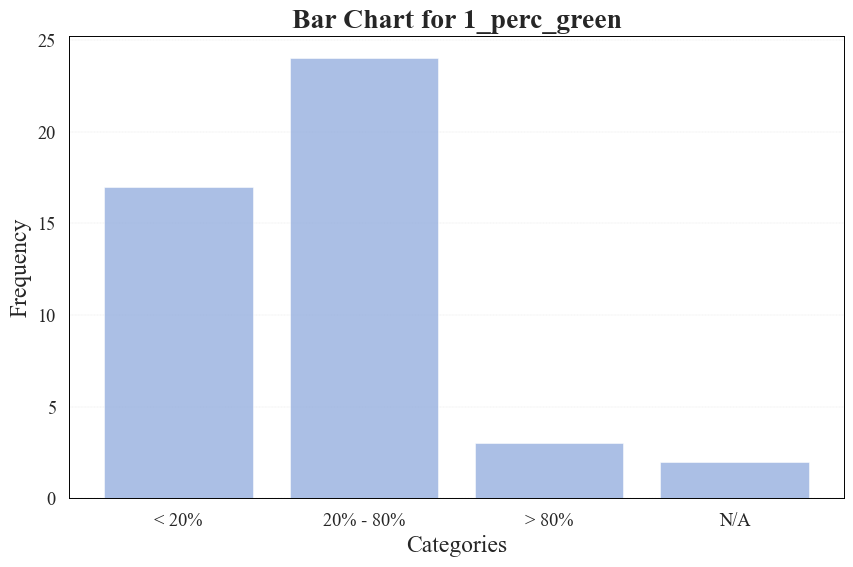

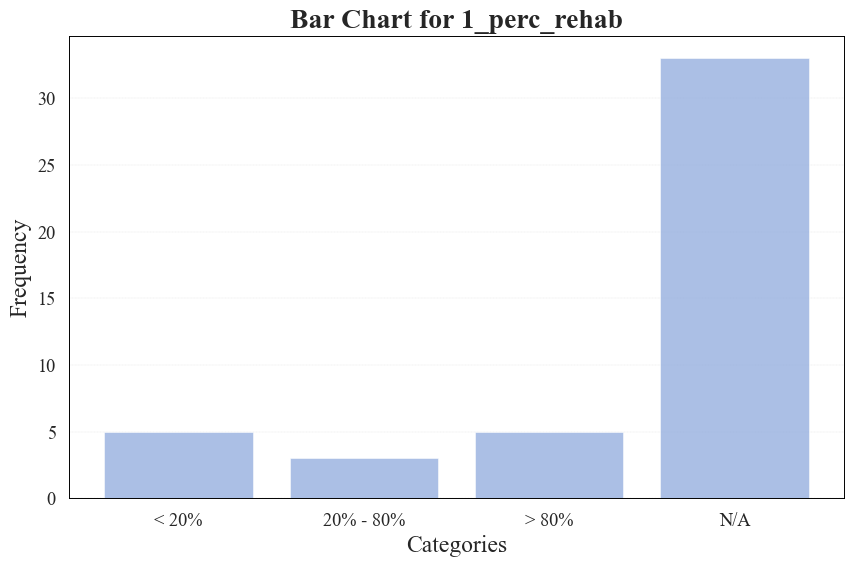

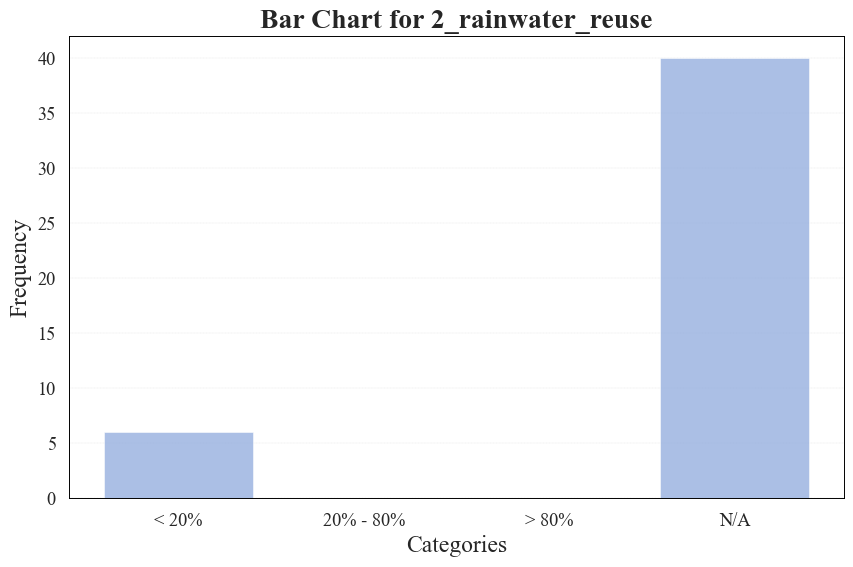

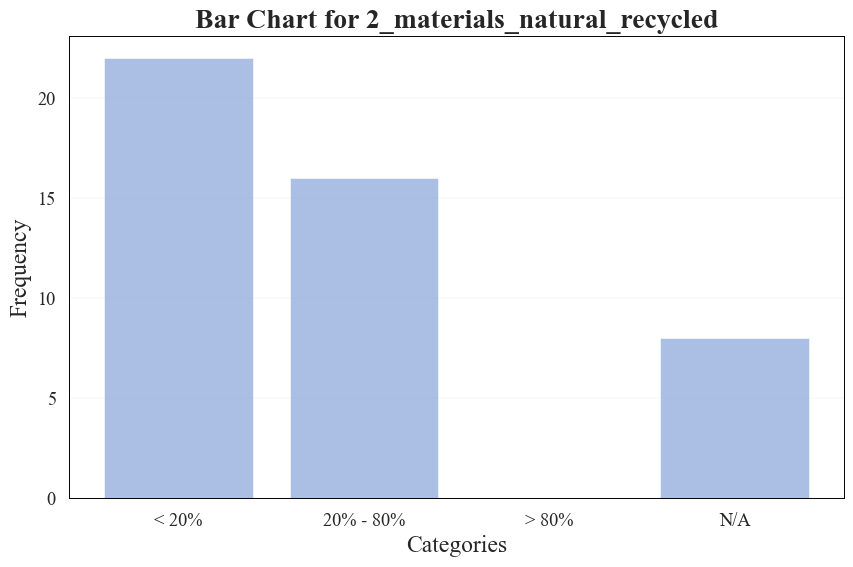

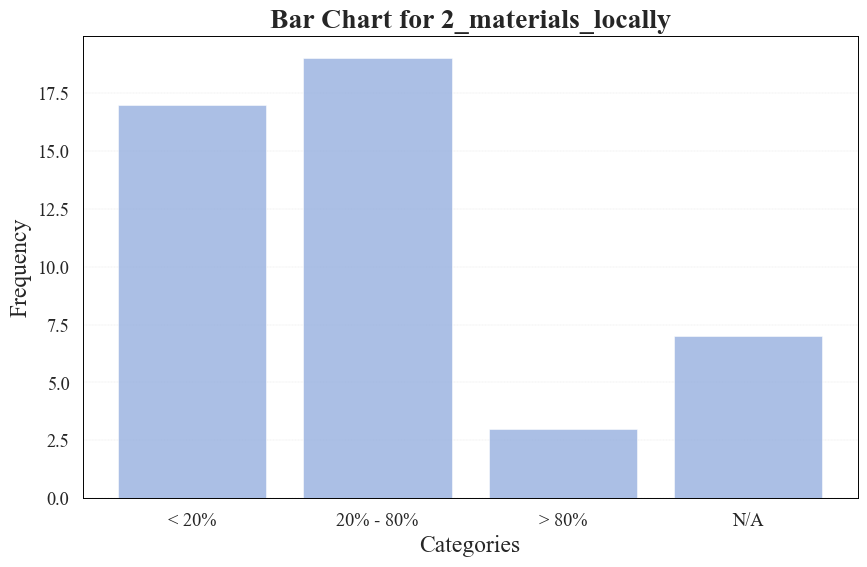

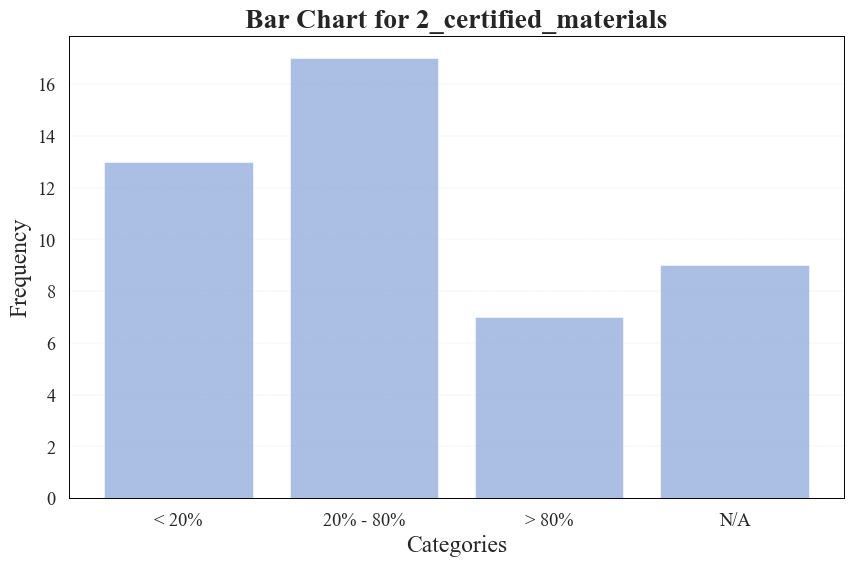

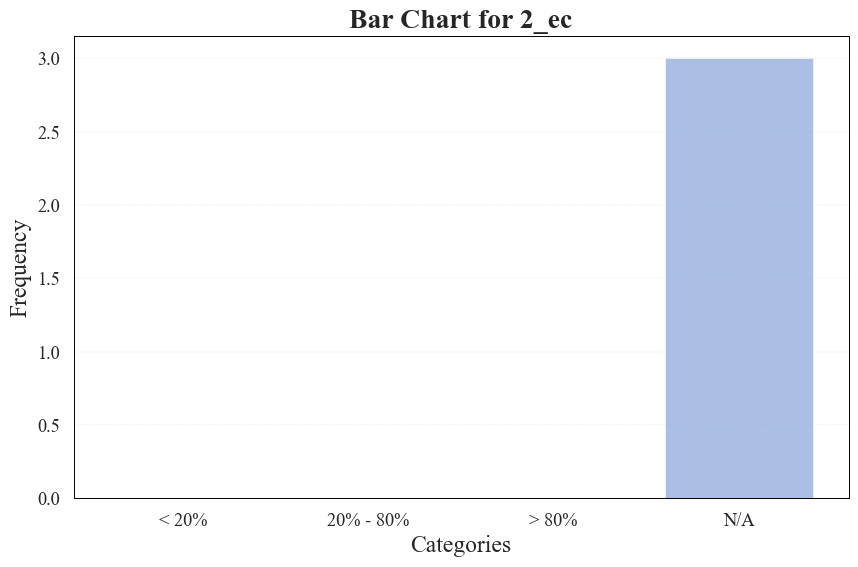

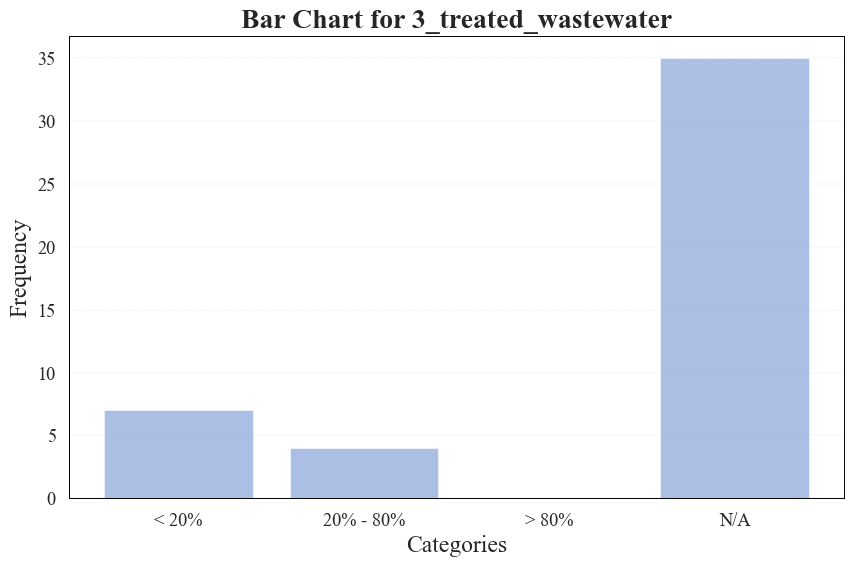

In [234]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

category_order = ['< 20%', '20% - 80%', '> 80%', 'N/A']

categorical_vars = ['1_perc_green', '1_perc_rehab',
    '2_rainwater_reuse', '2_materials_natural_recycled', '2_materials_locally',
    '2_certified_materials', '2_ec', '3_treated_wastewater']

# Create bar charts for each categorical variable
for var in categorical_vars:
    category_counts = df[var].value_counts(dropna=False)
    
    category_counts.index = category_counts.index.fillna('N/A')
    category_counts = category_counts.reindex(category_order, fill_value=0)
    
    plt.figure(figsize=(10, 6))
    plt.bar(category_counts.index, category_counts.values, color='#8faadd', alpha=0.75, linewidth=0.5, width=0.8)

    plt.title(f'Bar Chart for {var}', fontsize=20, fontweight='bold')
    plt.xlabel('Categories', fontsize=17)
    plt.ylabel('Frequency', fontsize=17)

    plt.gca().yaxis.grid(True, linestyle='dashed', color='lightgrey', linewidth=0.2)
    plt.gca().xaxis.grid(False)

    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['left'].set_linewidth(0.7)
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['bottom'].set_linewidth(0.7)
    plt.gca().spines['right'].set_color('black')
    plt.gca().spines['right'].set_linewidth(0.7)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['top'].set_linewidth(0.7)

    #plt.savefig(f'{var}_bar_chart.png', dpi=300)

    plt.show()

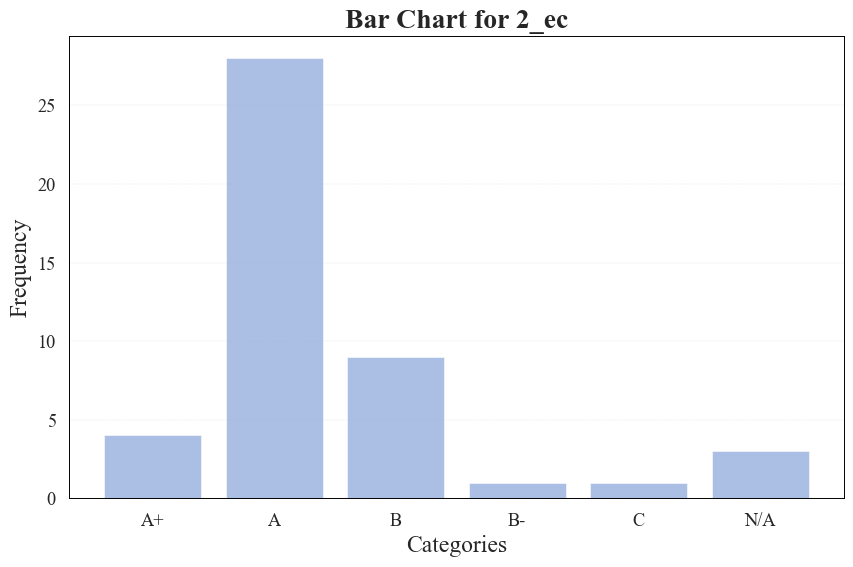

In [235]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

category_order = ['A+', 'A', 'B', 'B-', 'C', 'N/A']

categorical_vars = ['2_ec']

for var in categorical_vars:
    category_counts = df[var].value_counts(dropna=False)
    
    category_counts.index = category_counts.index.fillna('N/A')
    category_counts = category_counts.reindex(category_order, fill_value=0)
    
    plt.figure(figsize=(10, 6))
    plt.bar(category_counts.index, category_counts.values, color='#8faadd', alpha=0.75, linewidth=0.5, width=0.8)
    
    plt.title(f'Bar Chart for {var}', fontsize=20, fontweight='bold')
    plt.xlabel('Categories', fontsize=17)
    plt.ylabel('Frequency', fontsize=17)

    plt.gca().yaxis.grid(True, linestyle='dashed', color='lightgrey', linewidth=0.2)
    plt.gca().xaxis.grid(False)

    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['left'].set_linewidth(0.7)
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['bottom'].set_linewidth(0.7)
    plt.gca().spines['right'].set_color('black')
    plt.gca().spines['right'].set_linewidth(0.7)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['top'].set_linewidth(0.7)
    plt.savefig(f'barchart_{var}.png', dpi=300)

    #plt.savefig(f'{var}_bar_chart.png', dpi=300)

    plt.show()

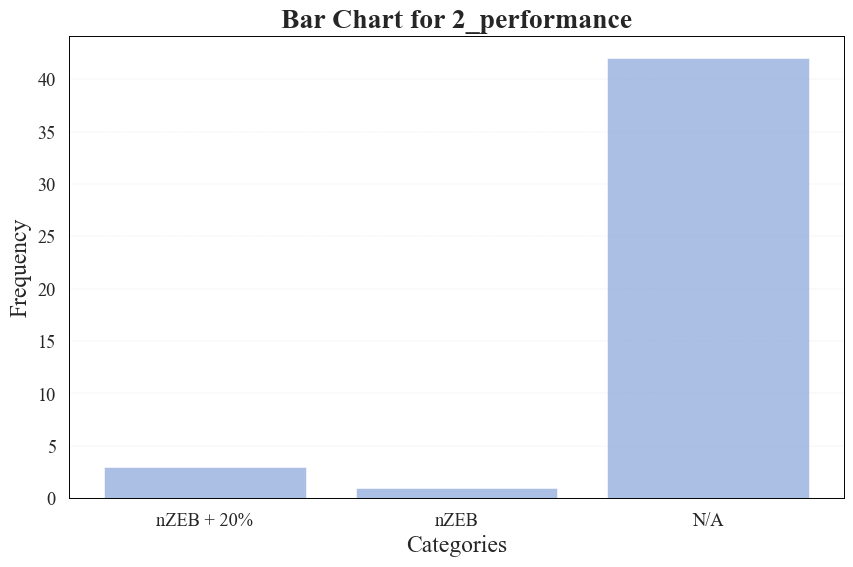

In [236]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

category_order = ['nZEB + 20%', 'nZEB','N/A']

categorical_vars = ['2_performance']

for var in categorical_vars:
    category_counts = df[var].value_counts(dropna=False)
    
    category_counts.index = category_counts.index.fillna('N/A')
    category_counts = category_counts.reindex(category_order, fill_value=0)
    
    plt.figure(figsize=(10, 6))
    plt.bar(category_counts.index, category_counts.values, color='#8faadd', alpha=0.75, linewidth=0.5, width=0.8)
    
    plt.title(f'Bar Chart for {var}', fontsize=20, fontweight='bold')
    plt.xlabel('Categories', fontsize=17)
    plt.ylabel('Frequency', fontsize=17)

    plt.gca().yaxis.grid(True, linestyle='dashed', color='lightgrey', linewidth=0.2)
    plt.gca().xaxis.grid(False)

    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['left'].set_linewidth(0.7)
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['bottom'].set_linewidth(0.7)
    plt.gca().spines['right'].set_color('black')
    plt.gca().spines['right'].set_linewidth(0.7)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['top'].set_linewidth(0.7)
    plt.savefig(f'barchart_{var}.png', dpi=300)
    
    #plt.savefig(f'{var}_bar_chart.png', dpi=300)

    plt.show()

In [181]:
# Homogeneity of variances (Levene's test)
independent_variables = ['1_perc_green', '1_perc_rehab',
    '2_rainwater_reuse', '2_materials_natural_recycled', '2_materials_locally',
    '2_certified_materials', '2_ec', '3_treated_wastewater']
dependent_variable = 'price_m2'

for variable in independent_variables:
    statistic, p_value = stats.levene(*[df.loc[df2[variable] == group, dependent_variable] for group in df2[variable].unique()])
    
    print(f"Variable: {variable}")
    print("Levene's test statistic:", statistic)
    print("p-value:", p_value)
    print()

Variable: 1_perc_green
Levene's test statistic: 4.020457634052507
p-value: 0.013308230635917039

Variable: 1_perc_rehab
Levene's test statistic: 0.3904906894616113
p-value: 0.7604435465331827

Variable: 2_rainwater_reuse
Levene's test statistic: 0.1286003830345188
p-value: 0.7216026398313218

Variable: 2_materials_natural_recycled
Levene's test statistic: 0.5720701946084225
p-value: 0.5685922193720652

Variable: 2_materials_locally
Levene's test statistic: 0.573192100565905
p-value: 0.6357991494732886

Variable: 2_certified_materials
Levene's test statistic: 0.8985879110491831
p-value: 0.44992809080729723

Variable: 2_ec
Levene's test statistic: 1.2967858452958643
p-value: 0.2872118519148286

Variable: 3_treated_wastewater
Levene's test statistic: 0.0919306676843324
p-value: 0.9123471763700923



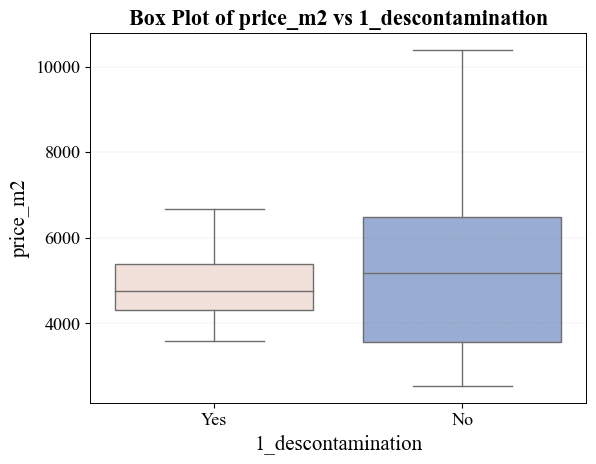

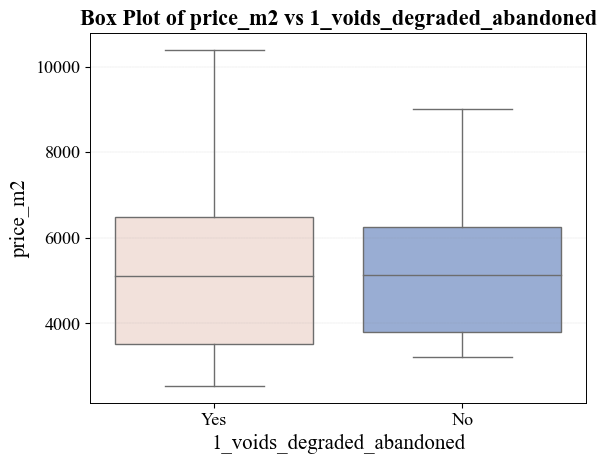

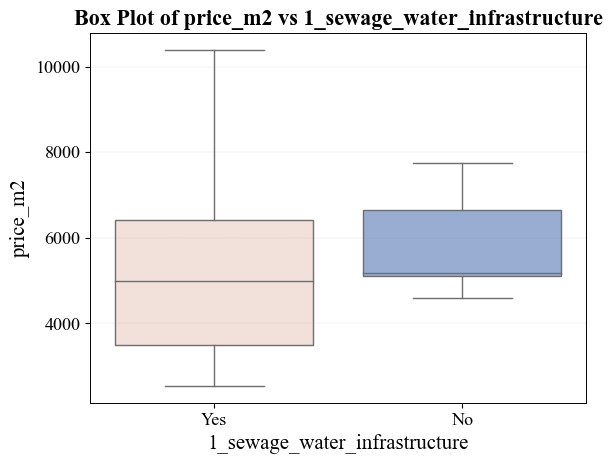

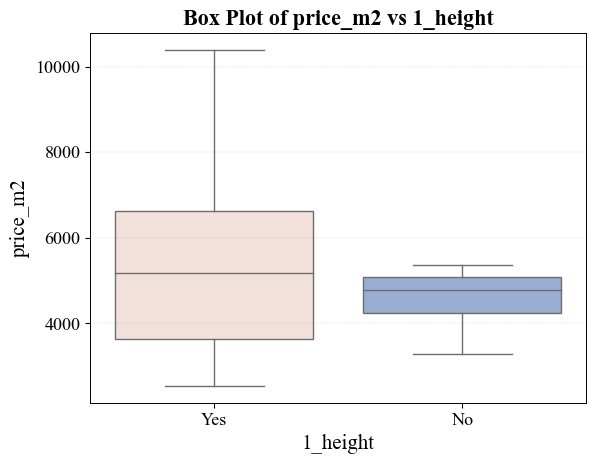

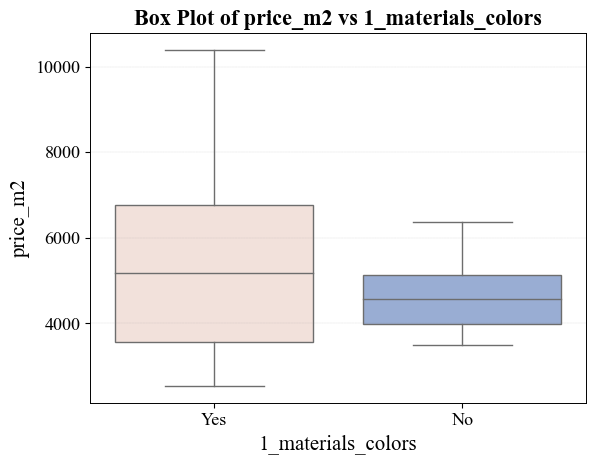

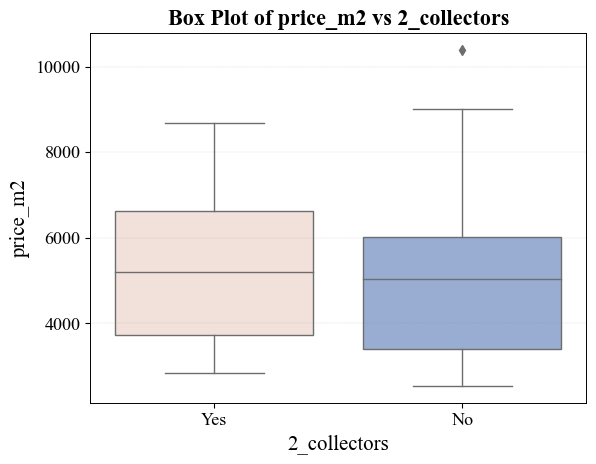

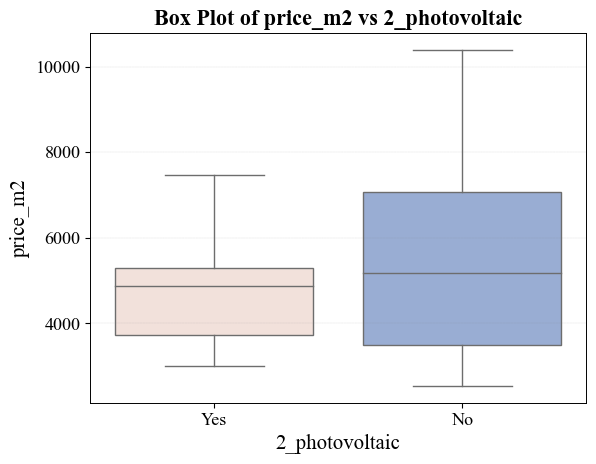

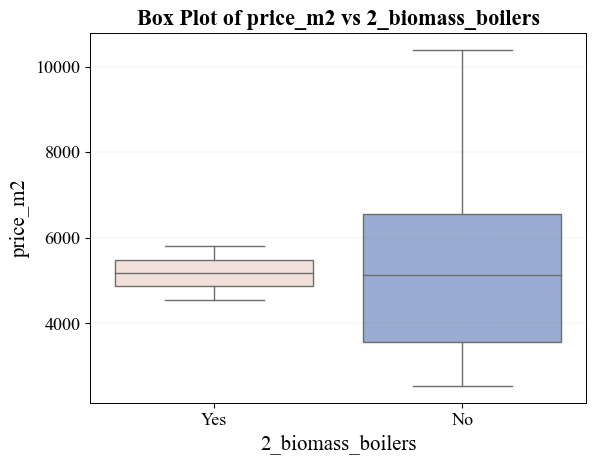

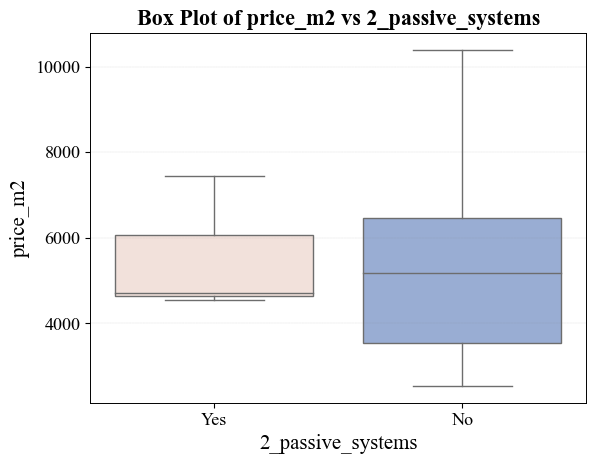

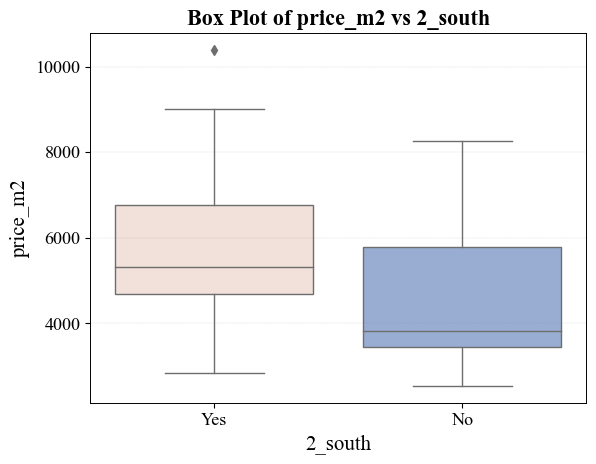

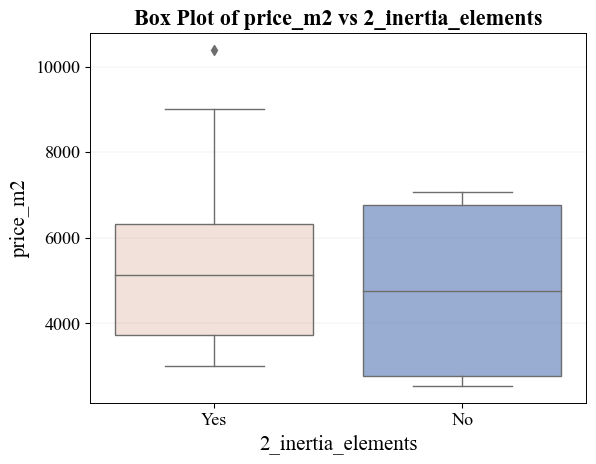

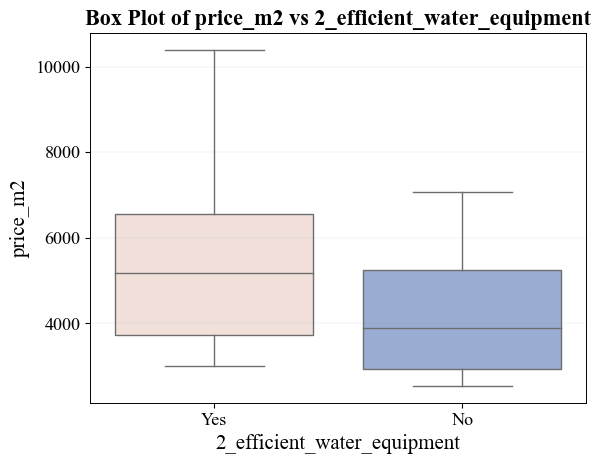

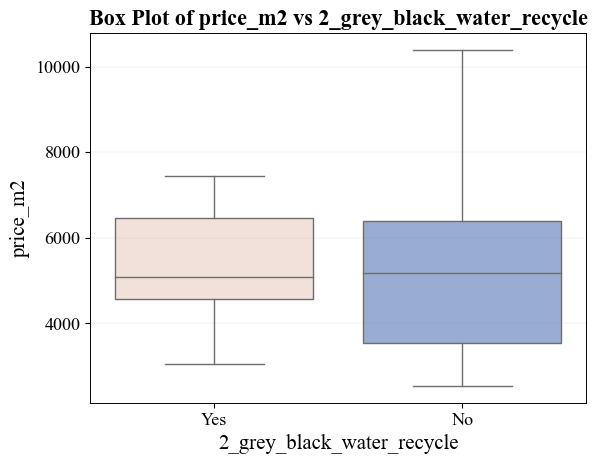

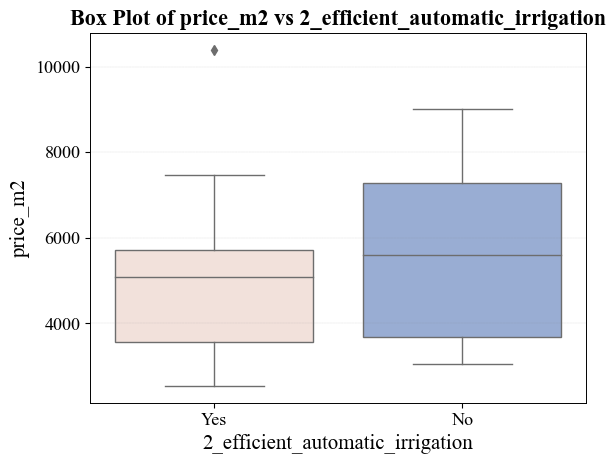

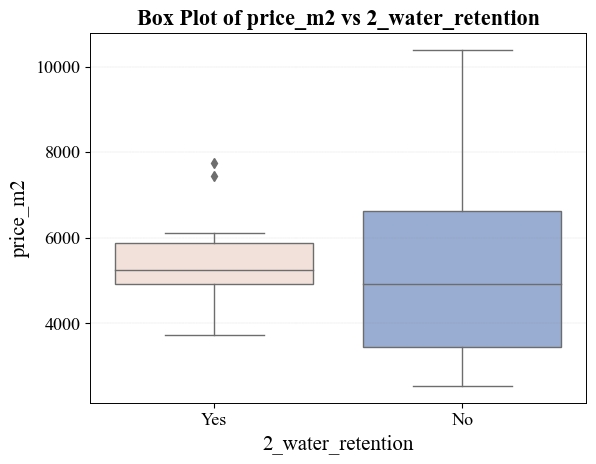

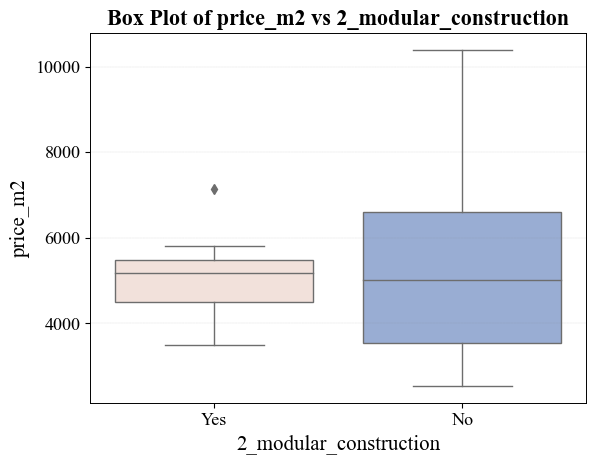

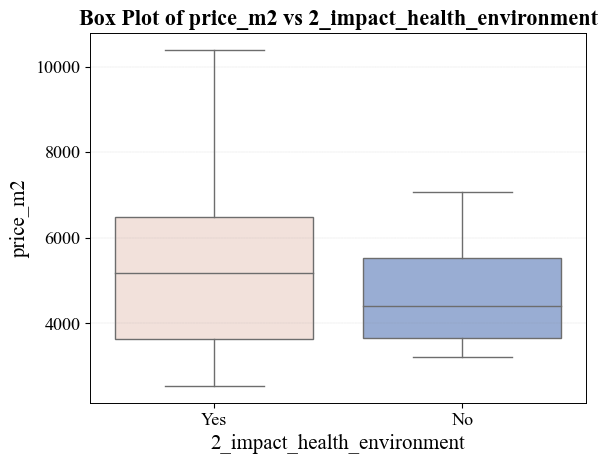

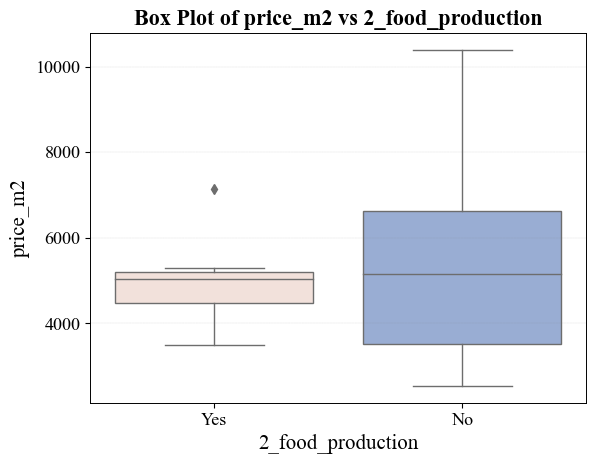

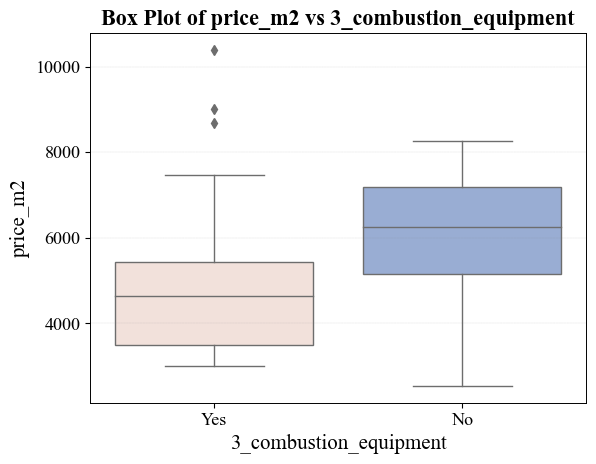

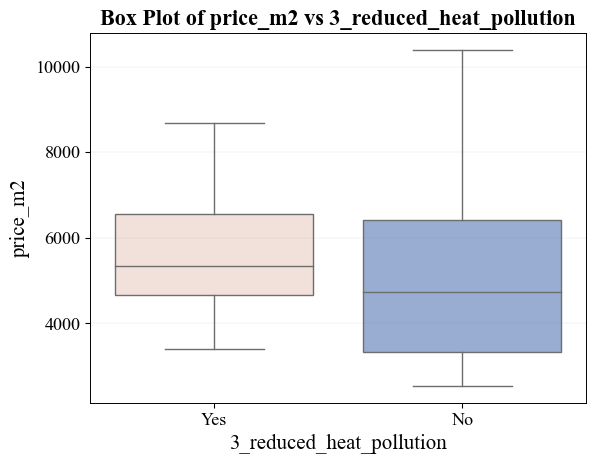

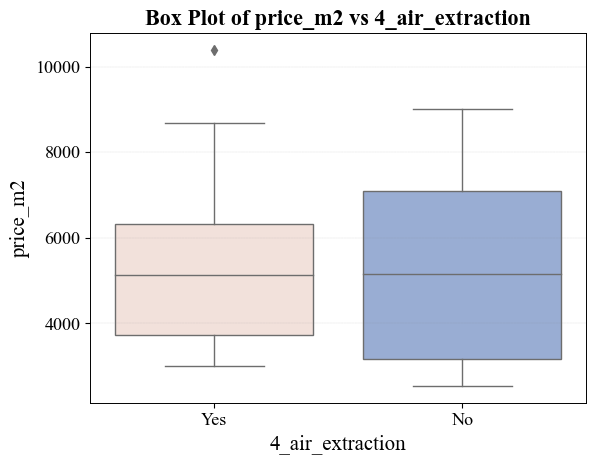

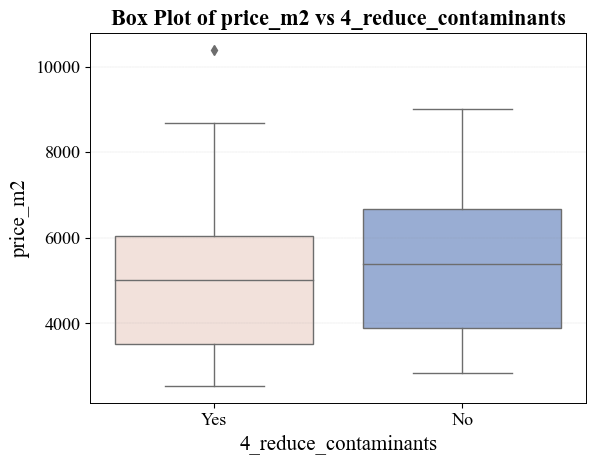

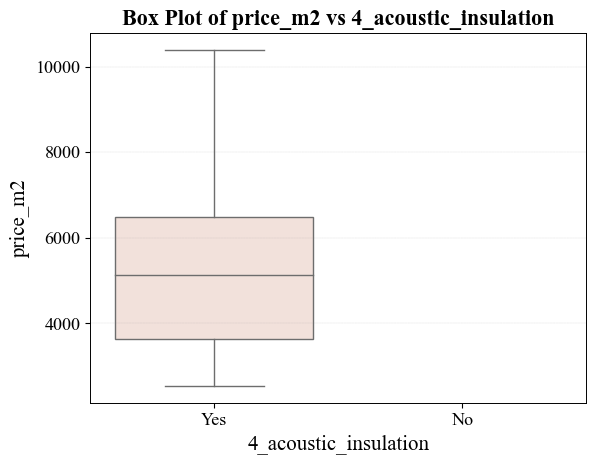

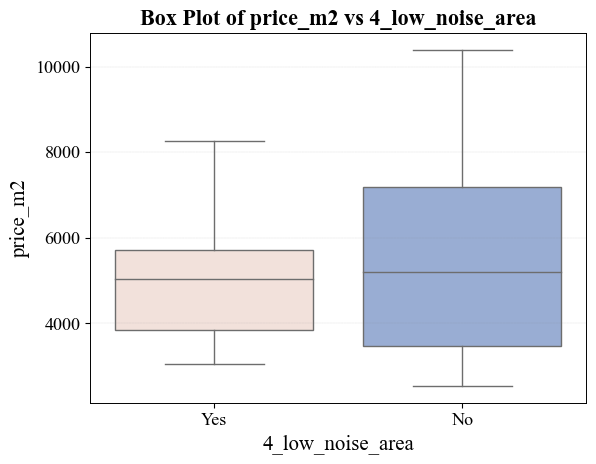

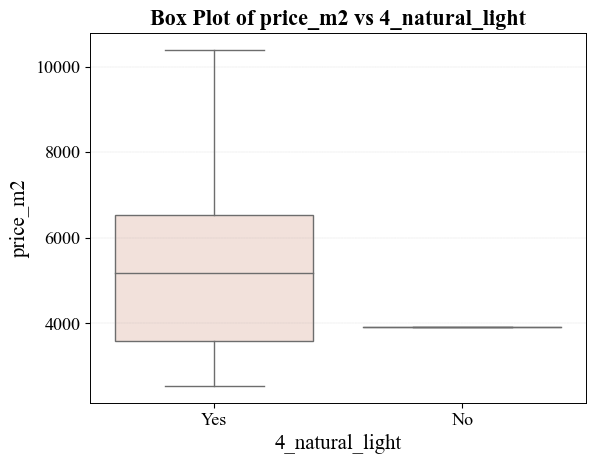

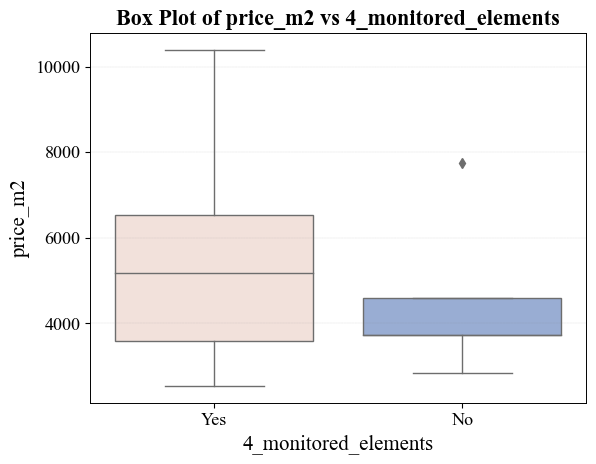

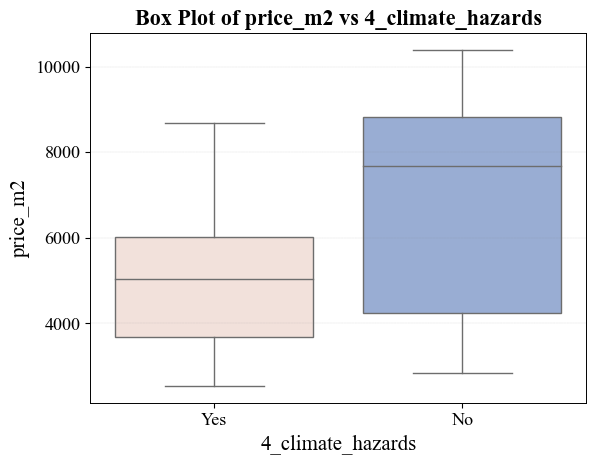

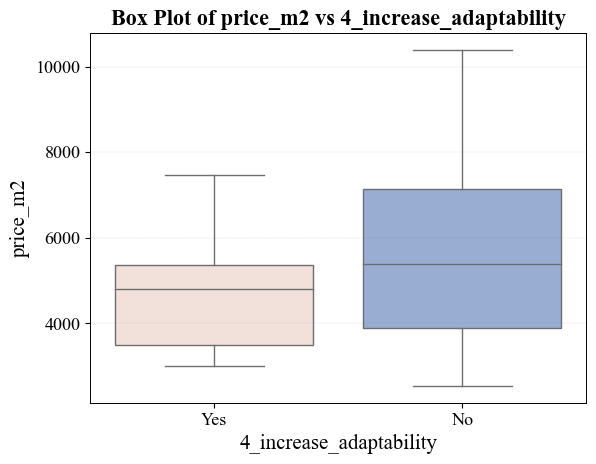

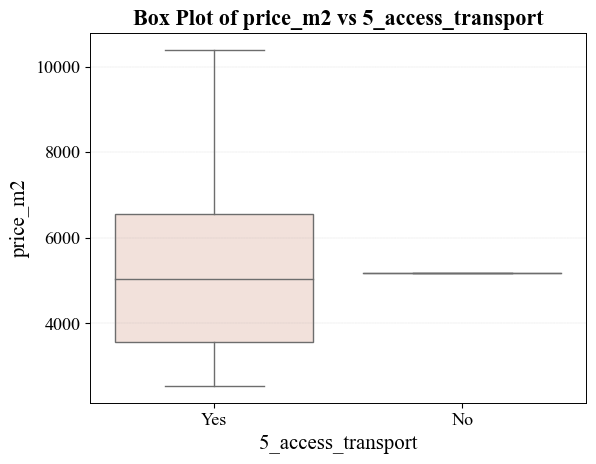

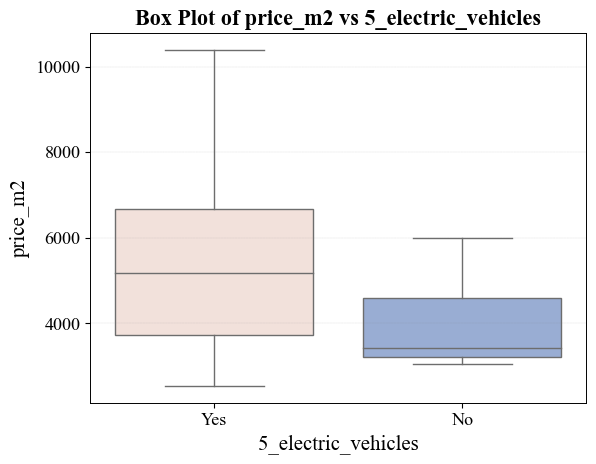

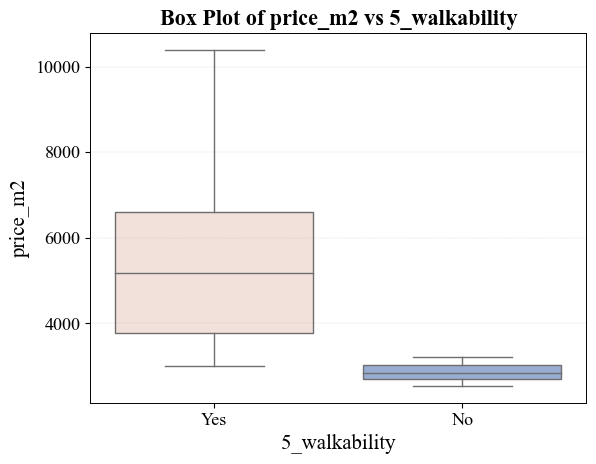

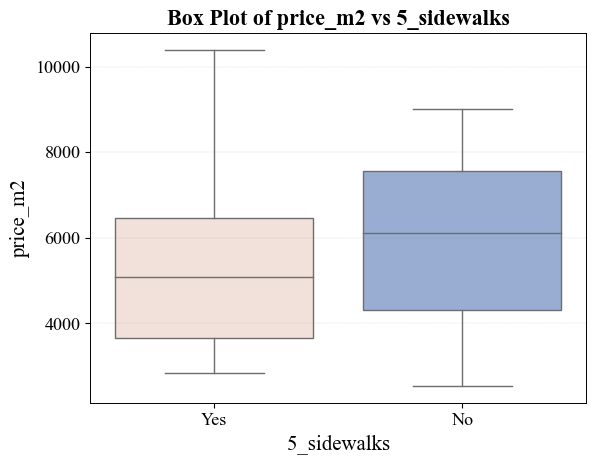

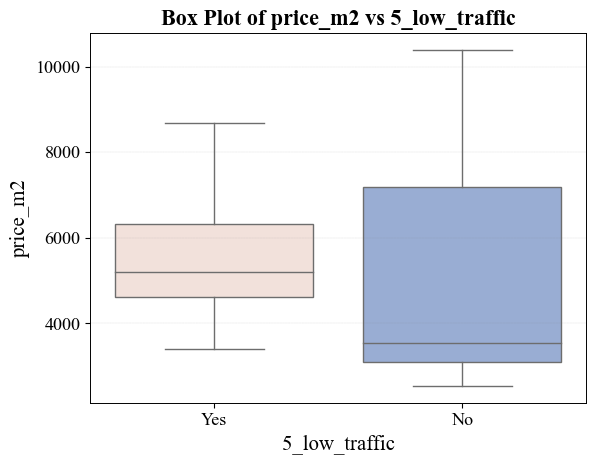

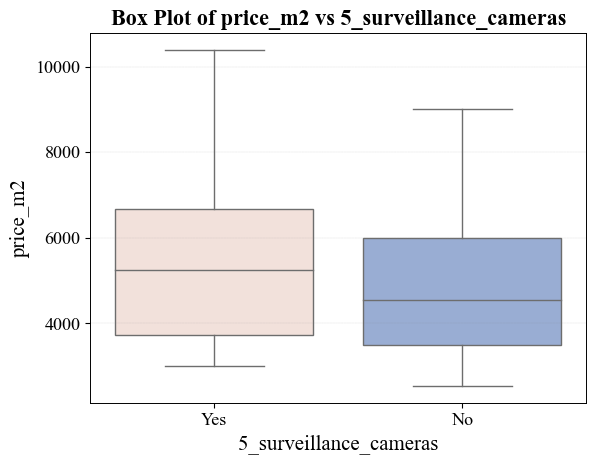

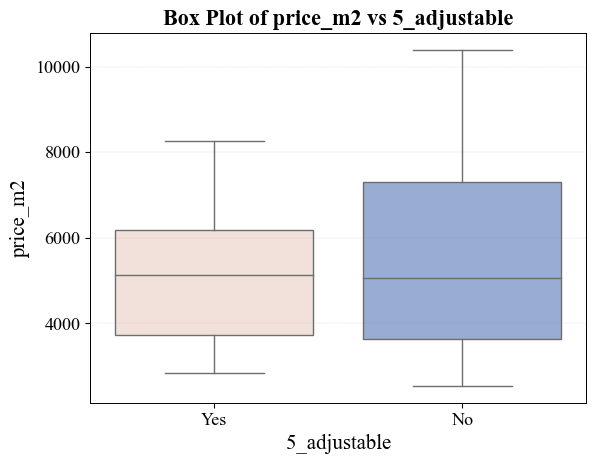

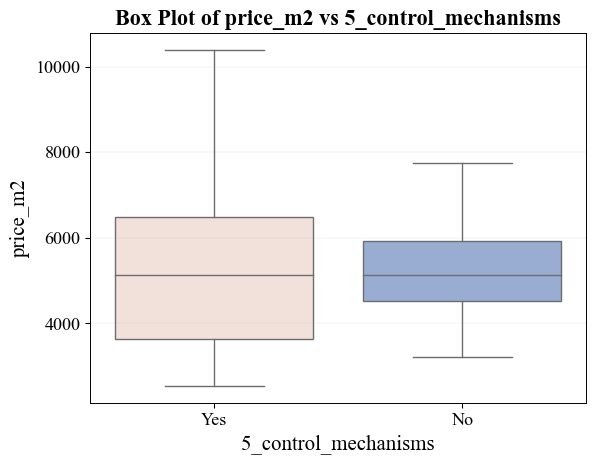

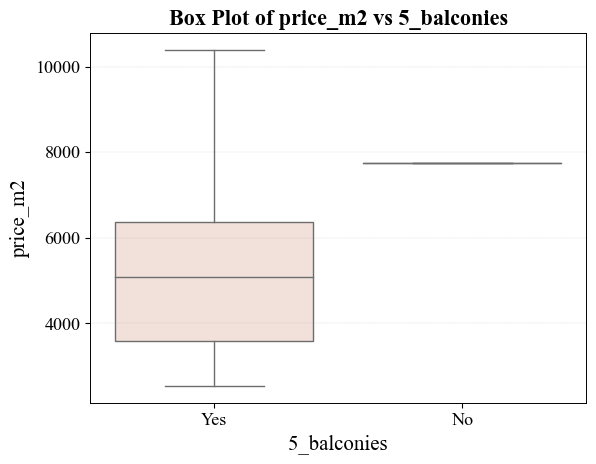

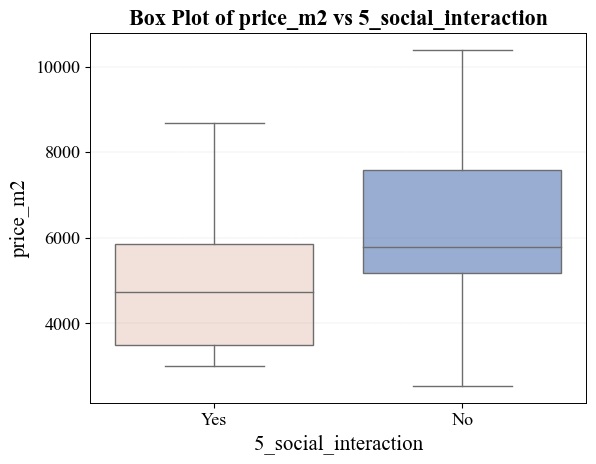

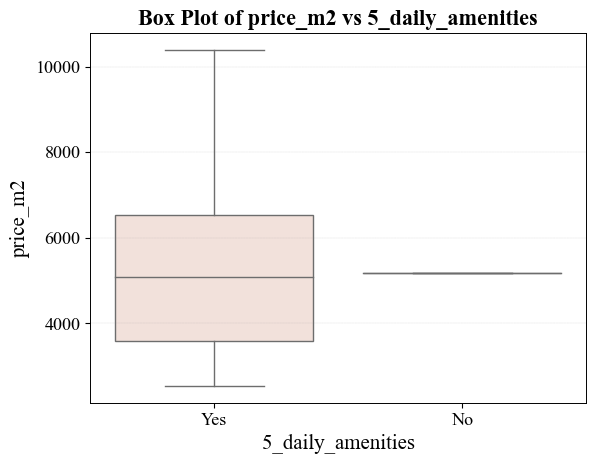

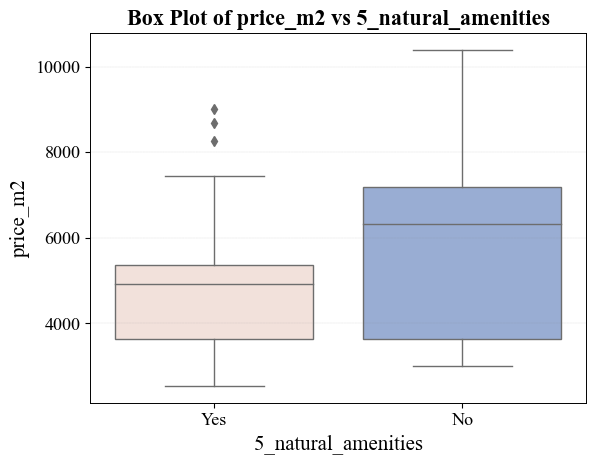

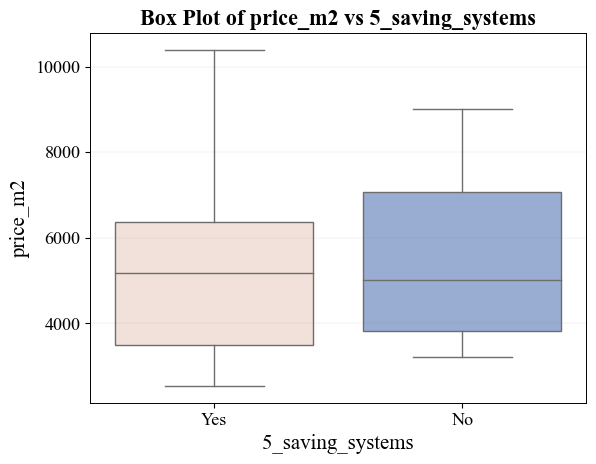

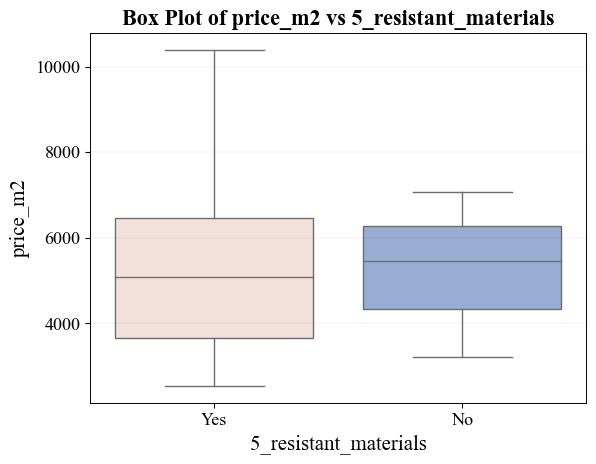

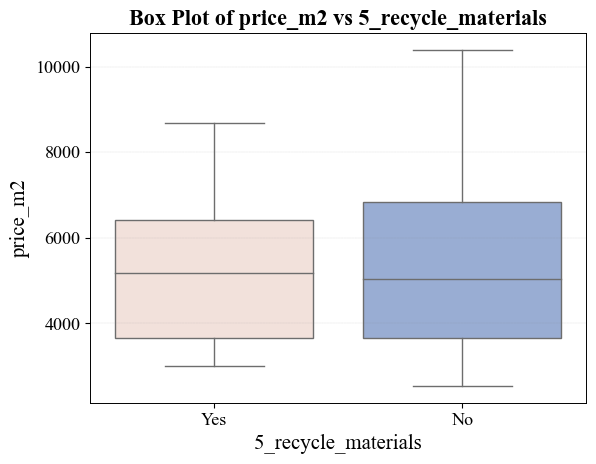

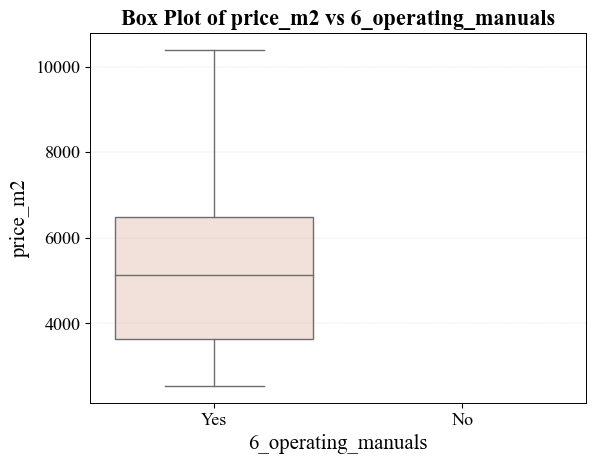

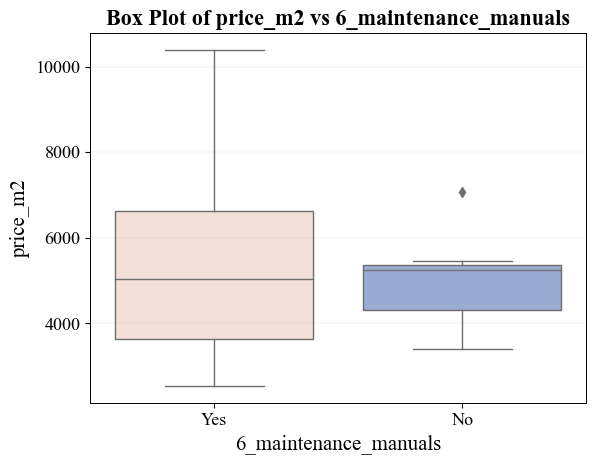

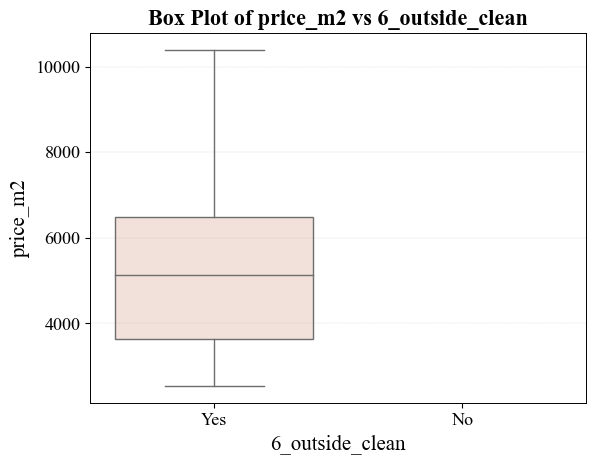

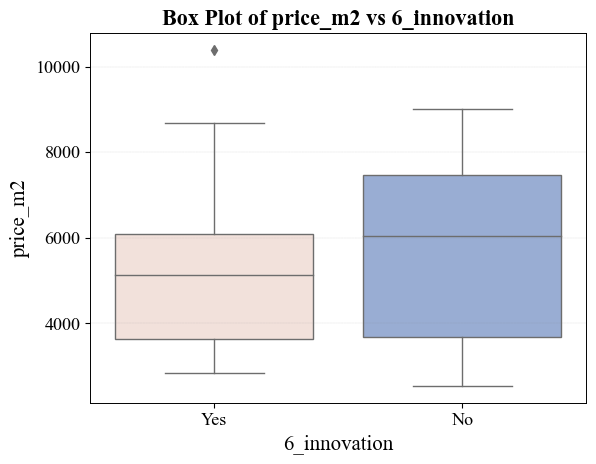

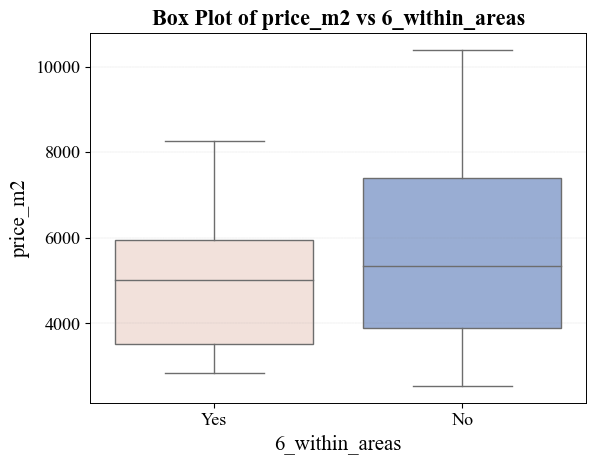

Summary Statistics for 1_descontamination:
                    count         mean          std     min     25%     50%  \
1_descontamination                                                            
No                   42.0  5302.738095  1921.549820  2536.0  3554.5  5176.5   
Yes                   4.0  4943.500000  1281.011189  3595.0  4315.0  4758.5   

                        75%      max  
1_descontamination                    
No                  6491.25  10393.0  
Yes                 5387.00   6662.0  

Summary Statistics for 1_voids_degraded_abandoned:
                            count         mean          std     min      25%  \
1_voids_degraded_abandoned                                                     
No                           20.0  5360.350000  1801.149319  3222.0  3786.25   
Yes                          26.0  5203.153846  1947.950876  2536.0  3510.25   

                               50%      75%      max  
1_voids_degraded_abandoned                            
N

In [22]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

custom_palette = ['#f6dfd7', '#8faadd','#e7e6e6', '#767171','#816592']
sns.set_palette(custom_palette)

independent_vars = ['1_descontamination', '1_voids_degraded_abandoned', '1_sewage_water_infrastructure', '1_height', '1_materials_colors', '2_collectors', '2_photovoltaic', '2_biomass_boilers', '2_passive_systems', '2_south', '2_inertia_elements', '2_efficient_water_equipment', '2_grey_black_water_recycle', '2_efficient_automatic_irrigation', '2_water_retention', '2_modular_construction', '2_impact_health_environment', '2_food_production', '3_combustion_equipment', '3_reduced_heat_pollution', '4_air_extraction', '4_reduce_contaminants', '4_acoustic_insulation', '4_low_noise_area', '4_natural_light', '4_monitored_elements', '4_climate_hazards', '4_increase_adaptability', '5_access_transport', '5_electric_vehicles', '5_walkability', '5_sidewalks', '5_low_traffic', '5_surveillance_cameras', '5_adjustable', '5_control_mechanisms', '5_balconies', '5_social_interaction', '5_daily_amenities', '5_natural_amenities', '5_saving_systems', '5_resistant_materials', '5_recycle_materials', '6_operating_manuals', '6_maintenance_manuals', '6_outside_clean', '6_innovation', '6_within_areas']

    
for var in independent_vars:
    fig, ax = plt.subplots()
    sns.boxplot(x=var, y='price_m2', data=df2, order=['Yes', 'No'], linewidth=1, boxprops=dict(linewidth=1))
    
    ax.set_facecolor('white')
    ax.yaxis.grid(True, linestyle='dashed', color='gray', linewidth=0.1)
    plt.title(f'Box Plot of price_m2 vs {var}', fontsize=16, fontweight='bold')
    plt.xlabel(var, fontsize=15)
    plt.ylabel('price_m2', fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(0.7)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(0.7)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(0.7)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(0.7)
    #plt.savefig(f'boxplot_{var}.png', dpi=300)
    plt.show()

for var in independent_vars:
    summary_stats = df2.groupby(var)['price_m2'].describe()
    print(f'Summary Statistics for {var}:\n{summary_stats}\n')

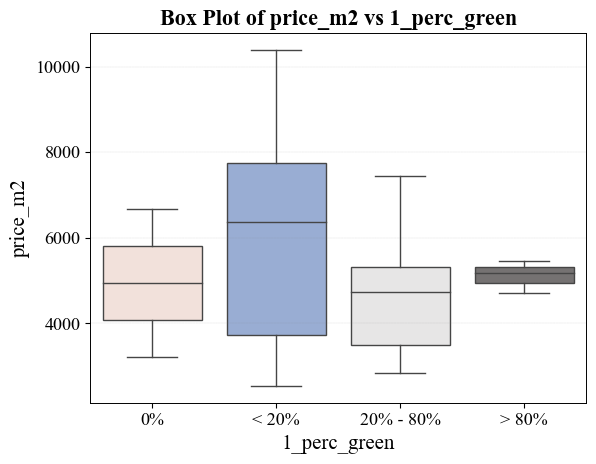

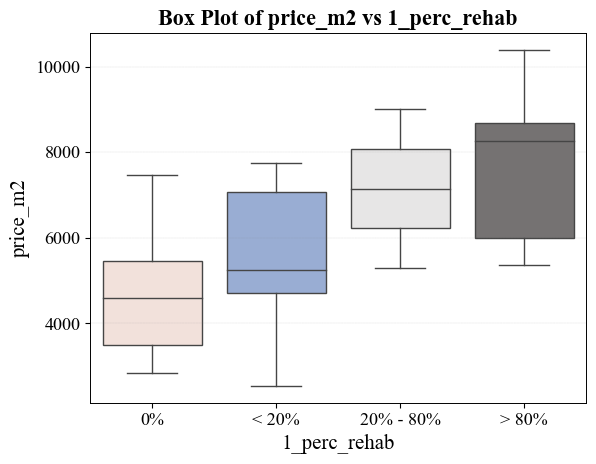

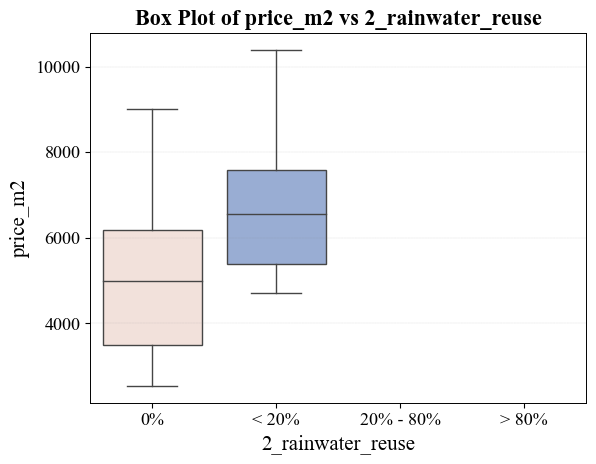

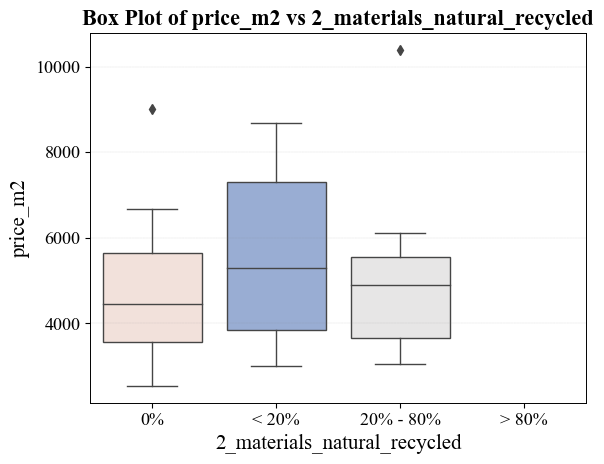

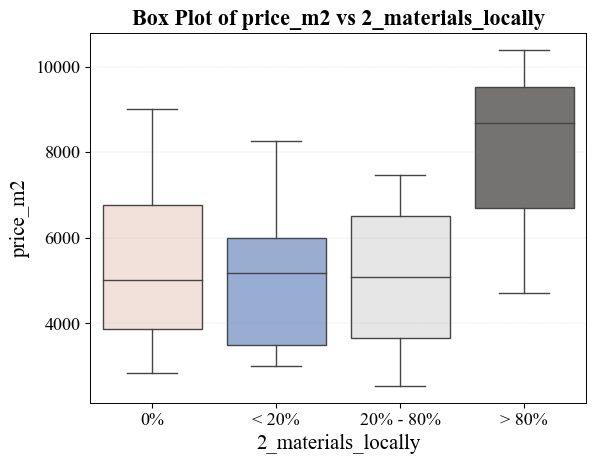

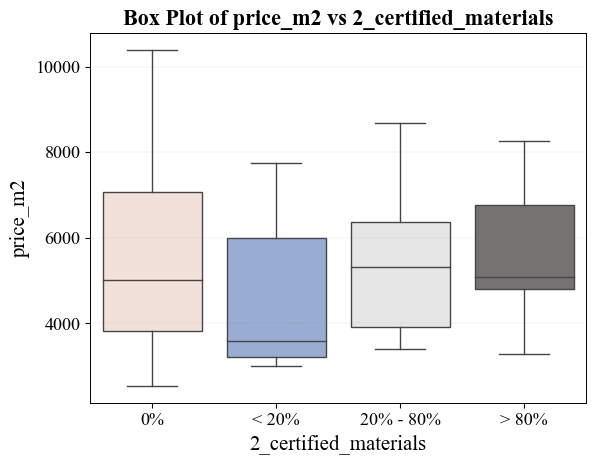

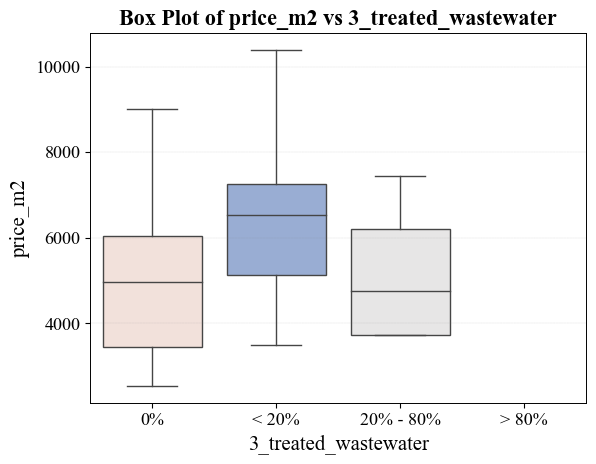

Summary Statistics for 1_perc_green:
              count         mean          std     min     25%     50%     75%  \
1_perc_green                                                                    
0%              2.0  4942.000000  2432.447327  3222.0  4082.0  4942.0  5802.0   
20% - 80%      24.0  4647.041667  1307.727816  2843.0  3495.5  4731.5  5307.5   
< 20%          17.0  6218.647059  2323.022867  2536.0  3727.0  6378.0  7744.0   
> 80%           3.0  5119.666667   382.089431  4711.0  4945.5  5180.0  5324.0   

                  max  
1_perc_green           
0%             6662.0  
20% - 80%      7435.0  
< 20%         10393.0  
> 80%          5468.0  

Summary Statistics for 1_perc_rehab:
              count         mean          std     min     25%     50%     75%  \
1_perc_rehab                                                                    
0%             33.0  4697.969697  1412.811370  2843.0  3482.0  4582.0  5468.0   
20% - 80%       3.0  7152.000000  1858.572840  5303

In [21]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

custom_palette = ['#f6dfd7', '#8faadd','#e7e6e6', '#767171','#816592']
sns.set_palette(custom_palette)

independent_vars = ['1_perc_green', '1_perc_rehab', '2_rainwater_reuse', '2_materials_natural_recycled', '2_materials_locally', '2_certified_materials', '3_treated_wastewater']

for var in independent_vars:
    fig, ax = plt.subplots()
    sns.boxplot(x=var, y='price_m2', data=df2, order=['0%', '< 20%', '20% - 80%', '> 80%'], linewidth=1, boxprops=dict(linewidth=1))
    
    ax.set_facecolor('white')
    ax.yaxis.grid(True, linestyle='dashed', color='gray', linewidth=0.1)
    plt.title(f'Box Plot of price_m2 vs {var}', fontsize=16, fontweight='bold')
    plt.xlabel(var, fontsize=15)
    plt.ylabel('price_m2', fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(0.7)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(0.7)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(0.7)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(0.7)
    #plt.savefig(f'boxplot_{var}.png', dpi=300)
    plt.show()

for var in independent_vars:
    summary_stats = df2.groupby(var)['price_m2'].describe()
    print(f'Summary Statistics for {var}:\n{summary_stats}\n')

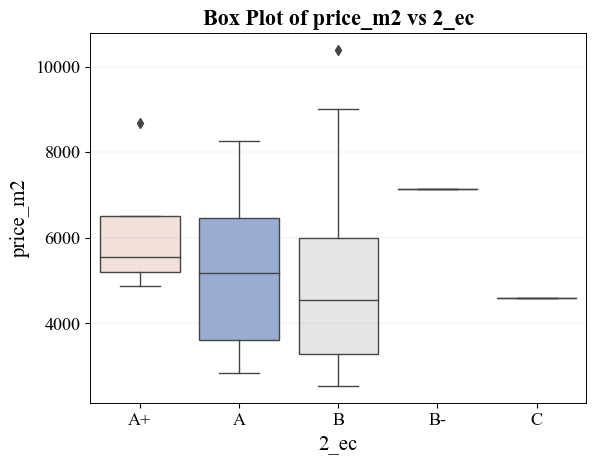

Summary Statistics for 2_ec:
      count         mean          std     min     25%     50%     75%      max
2_ec                                                                          
A      31.0  5118.096774  1630.696913  2843.0  3609.0  5173.0  6453.5   8272.0
A+      4.0  6165.500000  1718.272291  4881.0  5197.5  5550.0  6518.0   8681.0
B       9.0  5272.333333  2745.022495  2536.0  3290.0  4555.0  5987.0  10393.0
B-      1.0  7133.000000          NaN  7133.0  7133.0  7133.0  7133.0   7133.0
C       1.0  4582.000000          NaN  4582.0  4582.0  4582.0  4582.0   4582.0



In [24]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

custom_palette = ['#f6dfd7', '#8faadd','#e7e6e6', '#767171','#816592']
sns.set_palette(custom_palette)

independent_vars = ['2_ec']

for var in independent_vars:
    fig, ax = plt.subplots()
    sns.boxplot(x=var, y='price_m2', data=df2, order=['A+', 'A', 'B', 'B-', 'C'], linewidth=1, boxprops=dict(linewidth=1))
    
    ax.set_facecolor('white')
    ax.yaxis.grid(True, linestyle='dashed', color='gray', linewidth=0.1)
    plt.title(f'Box Plot of price_m2 vs {var}', fontsize=16, fontweight='bold')
    plt.xlabel(var, fontsize=15)
    plt.ylabel('price_m2', fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(0.7)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(0.7)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(0.7)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(0.7)
    #plt.savefig(f'boxplot_{var}.png', dpi=300)
    plt.show()

for var in independent_vars:
    summary_stats = df2.groupby(var)['price_m2'].describe()
    print(f'Summary Statistics for {var}:\n{summary_stats}\n')

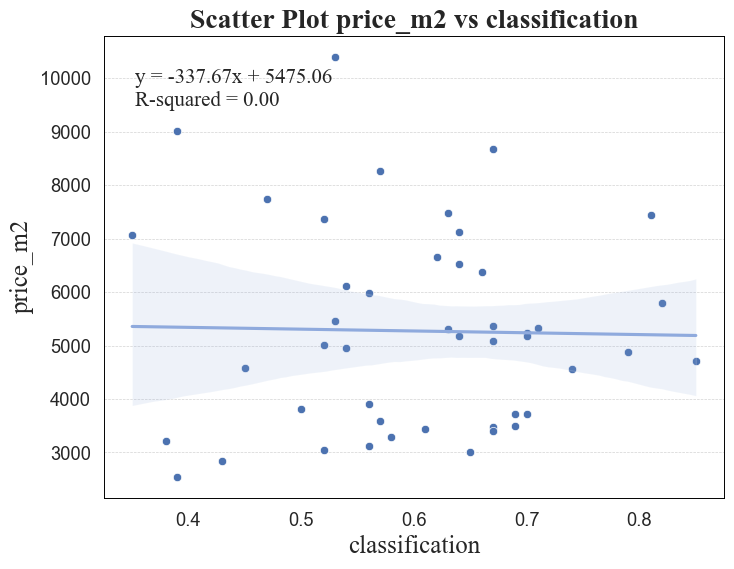

In [136]:
# Scatter plot of the "price_m2" vs "classification"

line_style = {'color': '#8faadd'}
sns.set(style='whitegrid', font_scale=1.2)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='classification', y='price_m2', data=df)

sns.regplot(x='classification', y='price_m2', data=df, scatter=False, line_kws=line_style)
x = df['classification']
y = df['price_m2']
coef = np.polyfit(x, y, deg=1)
poly1d_fn = np.poly1d(coef)
equation = f'y = {coef[0]:.2f}x + {coef[1]:.2f}'
r_squared = np.corrcoef(x, y)[0, 1] ** 2

plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=15, fontname='Times New Roman')
plt.annotate(f'R-squared = {r_squared:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=15, fontname='Times New Roman')

ax = plt.gca()
ax.yaxis.grid(True, linestyle='dashed', color='lightgray', linewidth=0.5)
ax.xaxis.grid(False)

ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(0.7)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.7)
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(0.7)
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth(0.7)

plt.xlabel('classification', fontsize=18, fontname='Times New Roman')
plt.ylabel('price_m2', fontsize=18, fontname='Times New Roman')
plt.title('Scatter Plot price_m2 vs classification', fontsize=20, fontweight='bold', fontname='Times New Roman')


#plt.savefig('ScatterPlot.png', dpi=300, bbox_inches='tight')

plt.show()


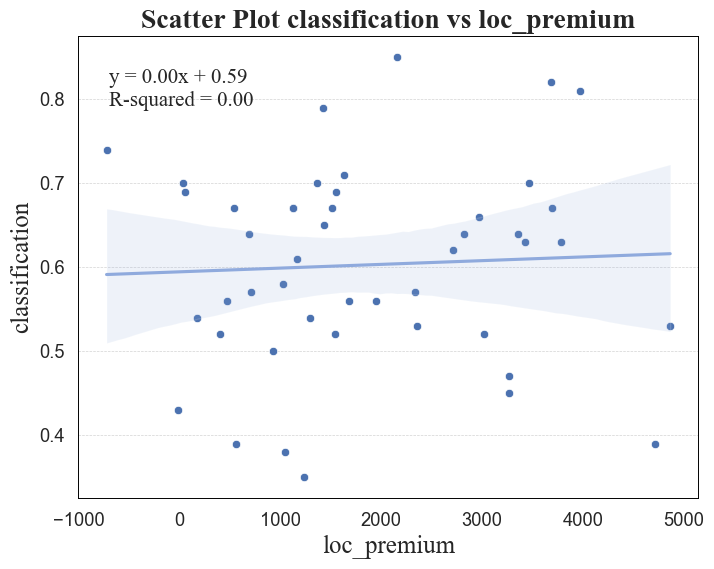

In [26]:
# Scatter plot of the "classification" vs "loc_premium"

line_style = {'color': '#8faadd'}

sns.set(style='whitegrid', font_scale=1.2)

plt.figure(figsize=(8, 6)) 
sns.scatterplot(x='loc_premium', y='classification', data=df)

sns.regplot(x='loc_premium', y='classification', data=df, scatter=False, line_kws=line_style)
x = df['loc_premium']
y = df['classification']
coef = np.polyfit(x, y, deg=1)
poly1d_fn = np.poly1d(coef)
equation = f'y = {coef[0]:.2f}x + {coef[1]:.2f}'
r_squared = np.corrcoef(x, y)[0, 1] ** 2

plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=15, fontname='Times New Roman')
plt.annotate(f'R-squared = {r_squared:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=15, fontname='Times New Roman')

ax = plt.gca()
ax.yaxis.grid(True, linestyle='dashed', color='lightgray', linewidth=0.5)
ax.xaxis.grid(False)

ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(0.7)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.7)
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(0.7)
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth(0.7)

plt.xlabel('loc_premium', fontsize=18, fontname='Times New Roman')
plt.ylabel('classification', fontsize=18, fontname='Times New Roman')
plt.title('Scatter Plot classification vs loc_premium', fontsize=20, fontweight='bold', fontname='Times New Roman')


#plt.savefig('ScatterPlot2.png', dpi=300, bbox_inches='tight')

plt.show()